In [1]:
# Import required packages
import sys
# !{sys.executable} -m pip install tqdm seaborn 
from glob import glob
import numpy as np
import joblib
import os
import pandas as pd
import json

import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from tqdm.notebook import tqdm
import seaborn as sns
from collections import Counter

# Split data if not already made

In [2]:
trainsize=[ 0.1,0.3, 0.5, 0.7,0.8]

In [3]:
# with open("/Users/grierjones/qregress/function-calc-test/quadratic/quadratic_train.bin",'rb') as f:
#     traindata=joblib.load(f)



# for ts in trainsize:
#     X_train, _, y_train, _ = train_test_split(traindata['X'],traindata['y'], train_size=int(ts*100),test_size=None,random_state=42)
#     savedata={'X':X_train,'y':y_train}
#     with open(f"/Users/grierjones/qregress/function-calc-test/quadratic/{ts}_quadratic_train.bin",'wb') as f:
#         joblib.dump(savedata,f)
#     # print(int(ts*100),X_train.shape, y_train.shape)

# Classical machine learning models and grid search parameters

In [4]:


gaussian_kernel = RBF()

models = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elastic': ElasticNet(),
    'knn': KNeighborsRegressor(),
    'rfr': RandomForestRegressor(),
    'grad': GradientBoostingRegressor(),
    'svr': SVR(),
    'krr': KernelRidge(),
    'gpr': GaussianProcessRegressor()
}

param_grid = {
    'ridge': {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
    },
    'knn': {
        'n_neighbors': range(1, 10),
        'weights': ['uniform', 'distance']
    },
    'rfr': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'grad': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7]
    },
    'svr': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.01, 0.001]
    },
    'krr': {
        'kernel': ['linear', 'poly', 'rbf'],
        'alpha': [0.001, 0.01, 0.1, 1],
        'gamma': [1, 0.1, 0.01, 0.001]
    },
    'gpr': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'kernel': [gaussian_kernel]
    },
    'lasso': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'max_iter': [1000, 2000, 3000]
    },
    'elastic': {
        'alpha': [0.001, 0.01, 0.1, 1],
        'l1_ratio': [0.2, 0.5, 0.8],
        'max_iter': [1000, 2000, 3000]
    }
}


Grid search Cross validation

In [5]:
def gridsearch(model,X_tr, y_tr,X_tst,y_tst):
    """
    Perform GridSearchCV for a given model

    parameters
    ----------
    model: str
        Name of model

    X_tr: np.array
        X training

    y_tr: np.array
        Y Training

    X_tst: np.array
        X test

    y_tst: np.array
        y test

    Returns
    -------
    scores: dict
        scored models
    """
    st = time.time()
    # Grab model and model parameters to perform gridsearchcv
    current_model = models[model]
    current_param_grid = param_grid[model]

    grid_search = GridSearchCV(current_model, current_param_grid, cv=5,n_jobs=-1)

    print(f'Now fitting {model}... ')

    grid_search.fit(X_tr, y_tr)

    best_model = grid_search.best_estimator_

    print(f'Completed fitting {model} in {time.time() - st} seconds. ')

    # Take the best model and evaluate using known metrics
    model=best_model
    scores = {}
    st = time.time()
    print('Now scoring model... ')
    y_tr_pred = model.predict(X_tr)
    y_tst_pred = model.predict(X_tst)

    plt.scatter(X_tr,y_tr_pred)
    plt.scatter(X_tst,y_tst_pred)
    plt.scatter(X_tr, y_tr)
    plt.scatter(X_tst,y_tst)
    plt.show()
            
    scores['MSE_train'] = mean_squared_error(y_tr, y_tr_pred),
    scores['R2_train'] = r2_score(y_tr, y_tr_pred)
    scores['MAE_train'] = mean_absolute_error(y_tr, y_tr_pred)
    scores['MSE_test'] = mean_squared_error(y_tst, y_tst_pred)
    scores['R2_test'] = r2_score(y_tst, y_tst_pred)
    scores['MAE_test'] = mean_absolute_error(y_tst, y_tst_pred)

    return scores



In [6]:
dirs=['quadratic','linear','sine']

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Now fitting ridge... 
Completed fitting ridge in 0.6460998058319092 seconds. 
Now scoring model... 


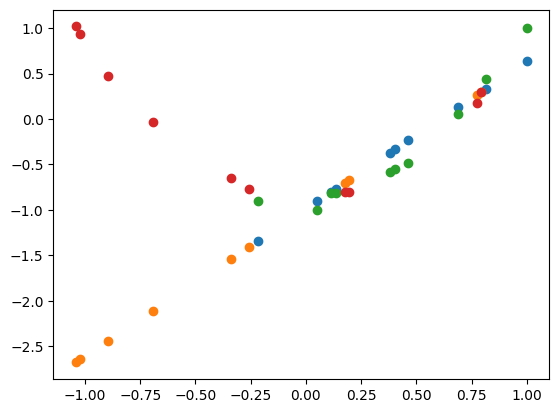

Scores saved as quadratic/0.1_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.08350992202758789 seconds. 
Now scoring model... 


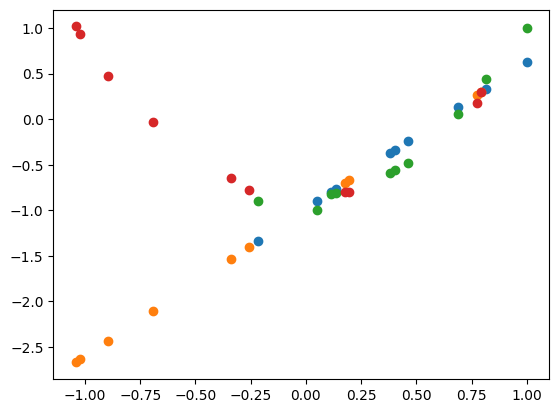

Scores saved as quadratic/0.1_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.043557167053222656 seconds. 
Now scoring model... 


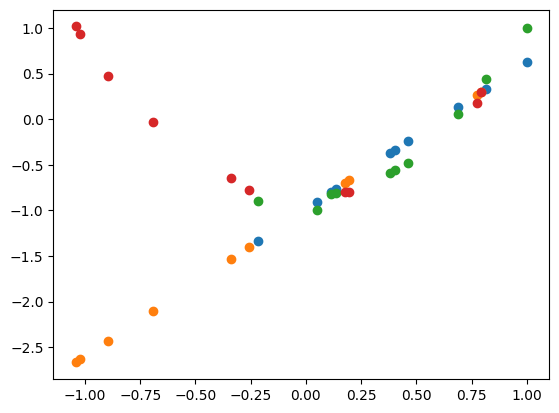

Scores saved as quadratic/0.1_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.06096506118774414 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/base.py", line 722, in score
    y_pred = self.predict(X)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/Users/grierjones/miniconda3

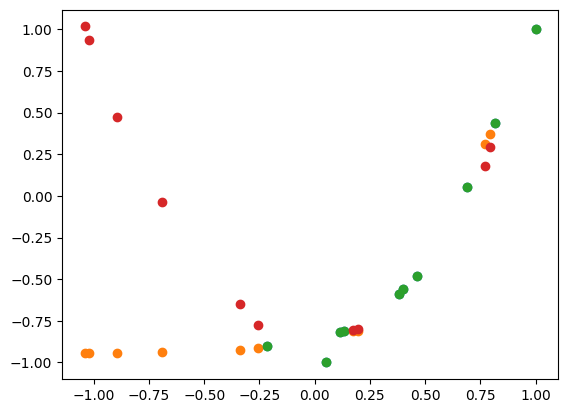

Scores saved as quadratic/0.1_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.311769723892212 seconds. 
Now scoring model... 


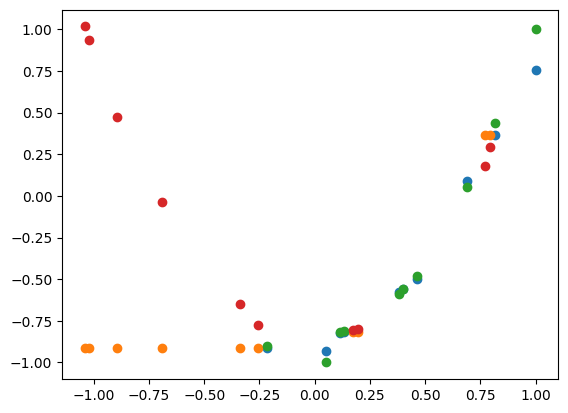

Scores saved as quadratic/0.1_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.38093018531799316 seconds. 
Now scoring model... 


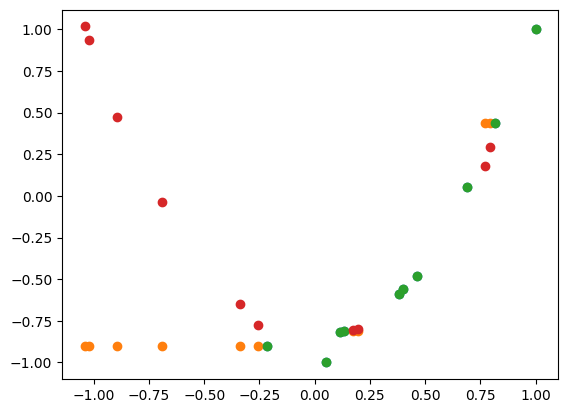

Scores saved as quadratic/0.1_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.01668405532836914 seconds. 
Now scoring model... 


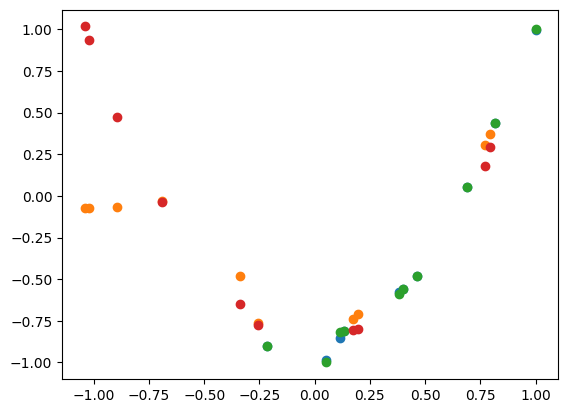

Scores saved as quadratic/0.1_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.0395662784576416 seconds. 
Now scoring model... 


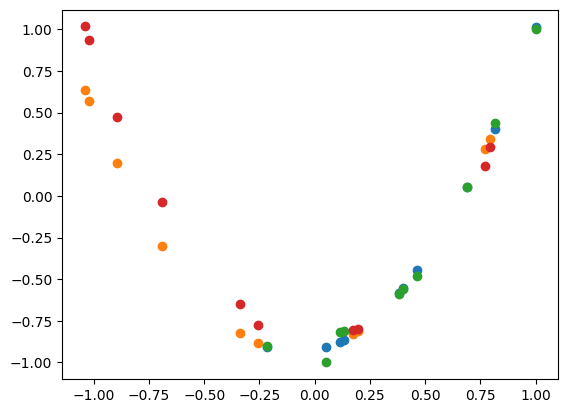

Scores saved as quadratic/0.1_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.052520036697387695 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


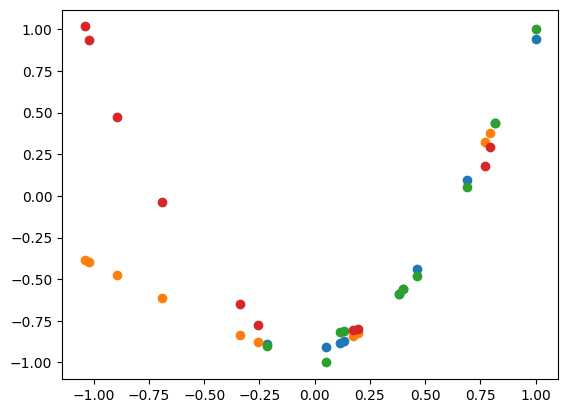

Scores saved as quadratic/0.1_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.026318073272705078 seconds. 
Now scoring model... 


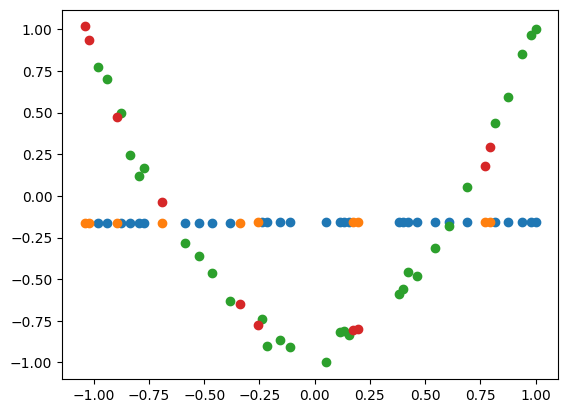

Scores saved as quadratic/0.3_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.013862133026123047 seconds. 
Now scoring model... 


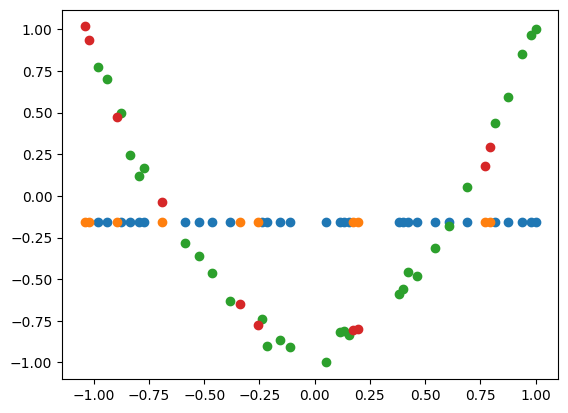

Scores saved as quadratic/0.3_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.027076005935668945 seconds. 
Now scoring model... 


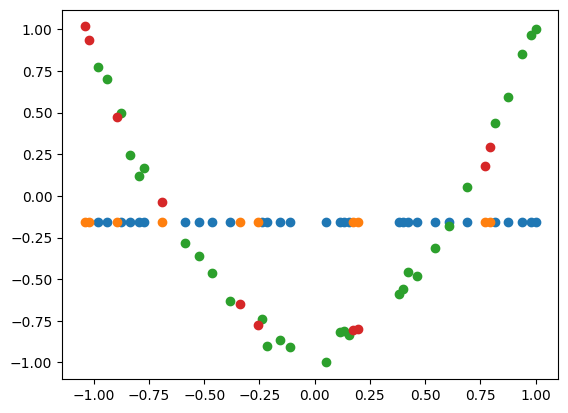

Scores saved as quadratic/0.3_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.01755690574645996 seconds. 
Now scoring model... 


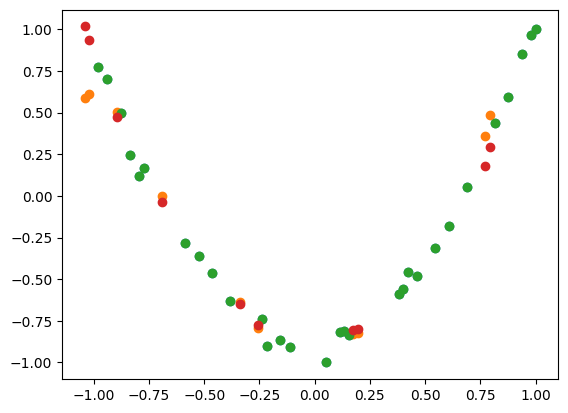

Scores saved as quadratic/0.3_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2342462539672852 seconds. 
Now scoring model... 


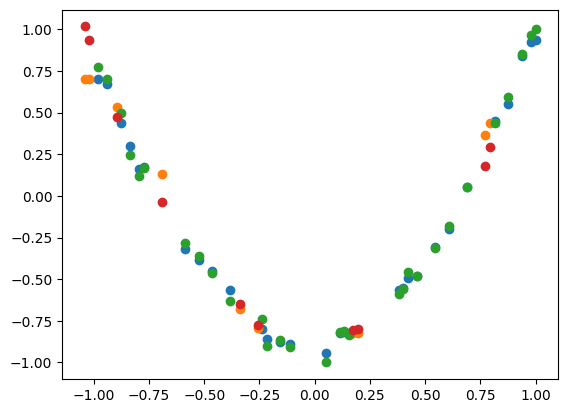

Scores saved as quadratic/0.3_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4032440185546875 seconds. 
Now scoring model... 


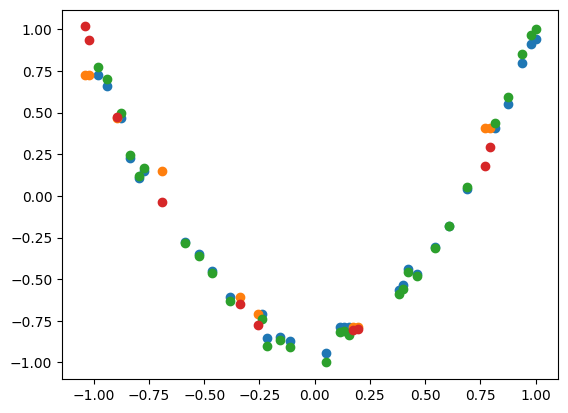

Scores saved as quadratic/0.3_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.017654895782470703 seconds. 
Now scoring model... 


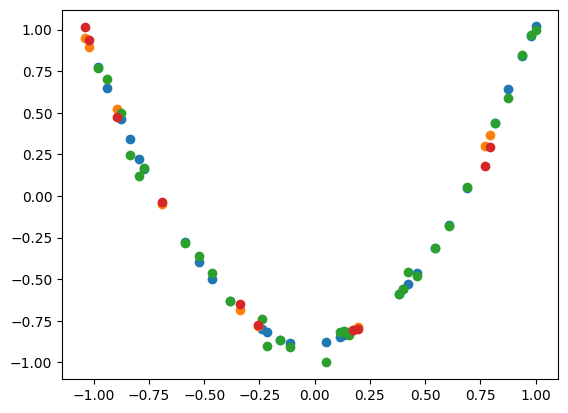

Scores saved as quadratic/0.3_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.03928112983703613 seconds. 
Now scoring model... 


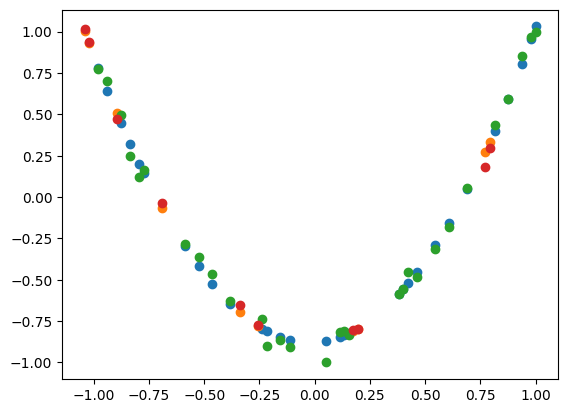

Scores saved as quadratic/0.3_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.02105712890625 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

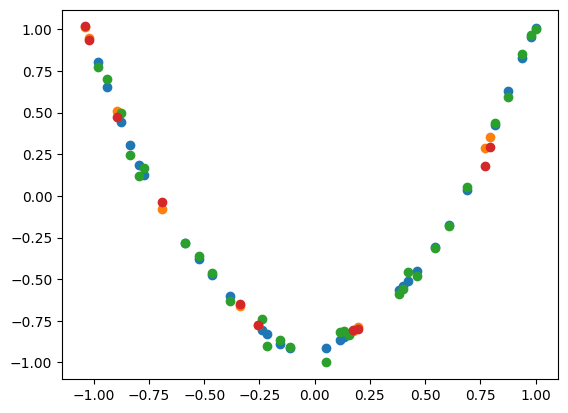

Scores saved as quadratic/0.3_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.034744977951049805 seconds. 
Now scoring model... 


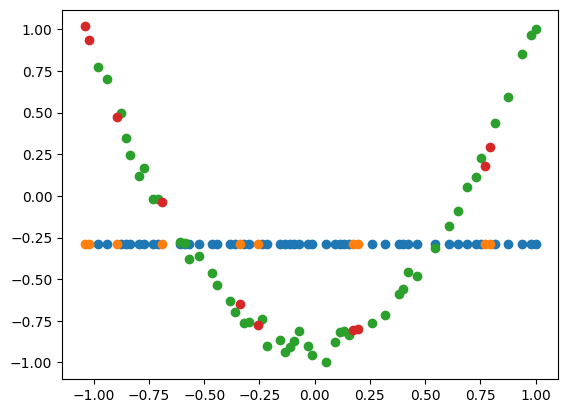

Scores saved as quadratic/0.5_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.018552780151367188 seconds. 
Now scoring model... 


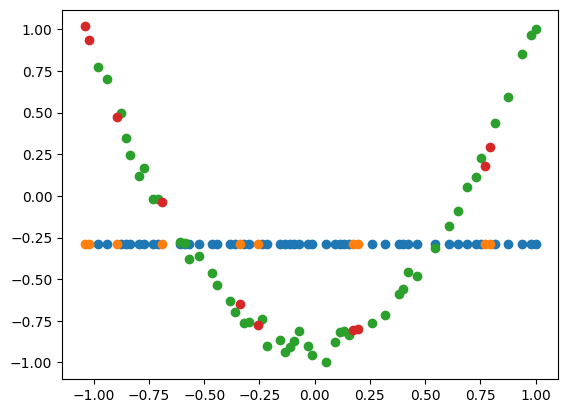

Scores saved as quadratic/0.5_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.028331995010375977 seconds. 
Now scoring model... 


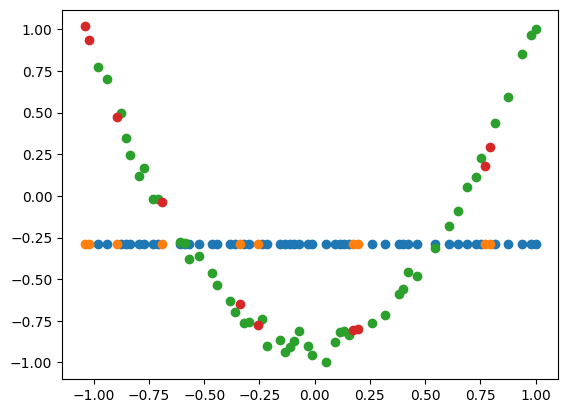

Scores saved as quadratic/0.5_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.0172119140625 seconds. 
Now scoring model... 


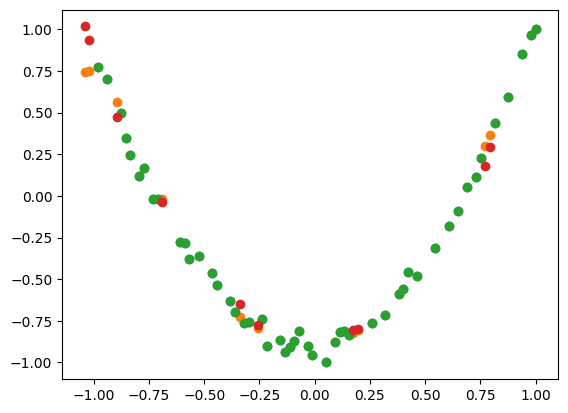

Scores saved as quadratic/0.5_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3189139366149902 seconds. 
Now scoring model... 


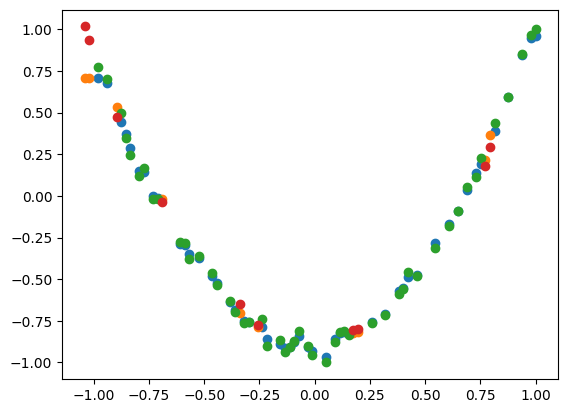

Scores saved as quadratic/0.5_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4142179489135742 seconds. 
Now scoring model... 


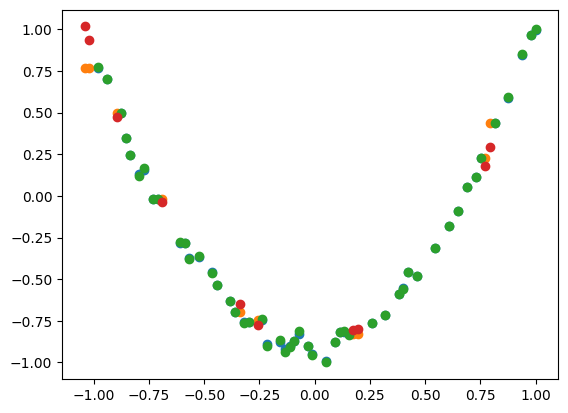

Scores saved as quadratic/0.5_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.024238109588623047 seconds. 
Now scoring model... 


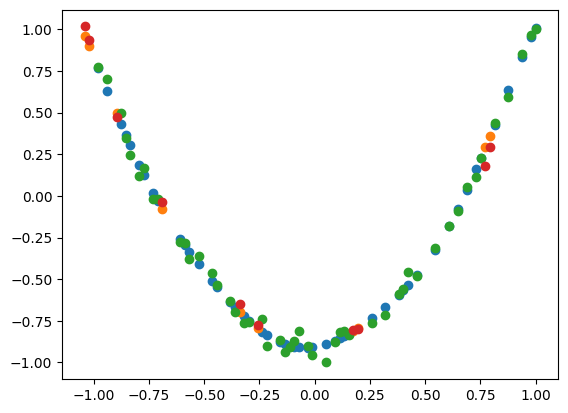

Scores saved as quadratic/0.5_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.04009294509887695 seconds. 
Now scoring model... 


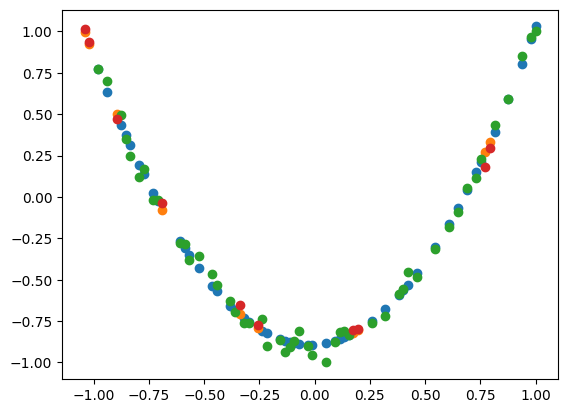

Scores saved as quadratic/0.5_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.024049043655395508 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

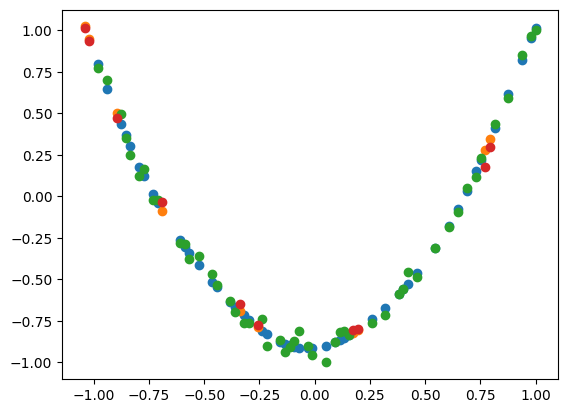

Scores saved as quadratic/0.5_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.07072114944458008 seconds. 
Now scoring model... 


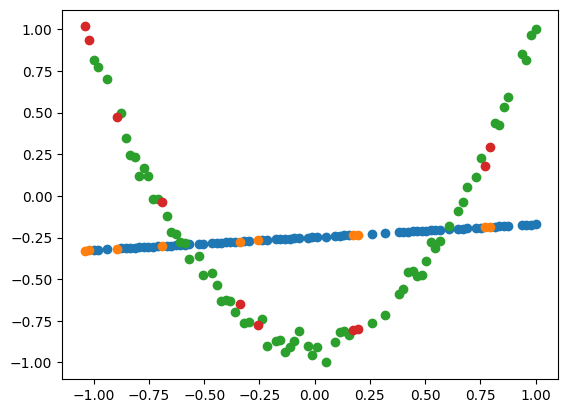

Scores saved as quadratic/0.7_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.012717723846435547 seconds. 
Now scoring model... 


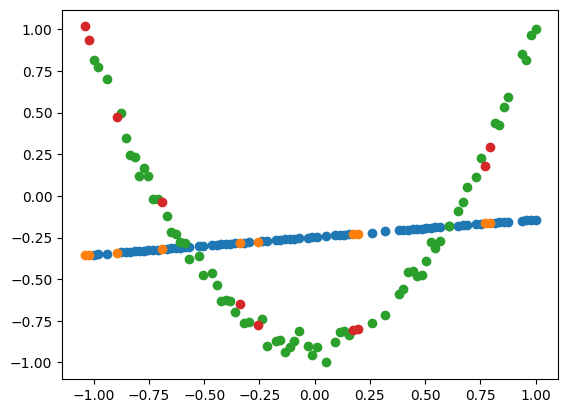

Scores saved as quadratic/0.7_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.028456926345825195 seconds. 
Now scoring model... 


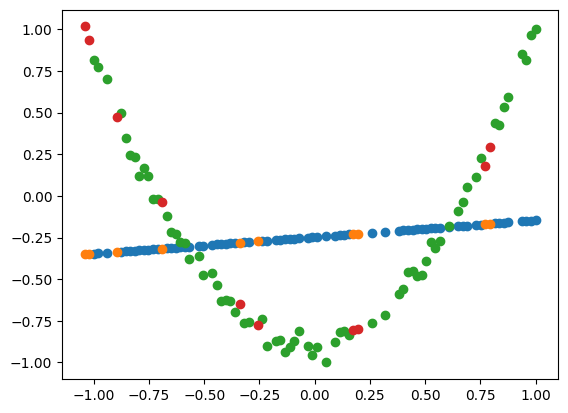

Scores saved as quadratic/0.7_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.016993999481201172 seconds. 
Now scoring model... 


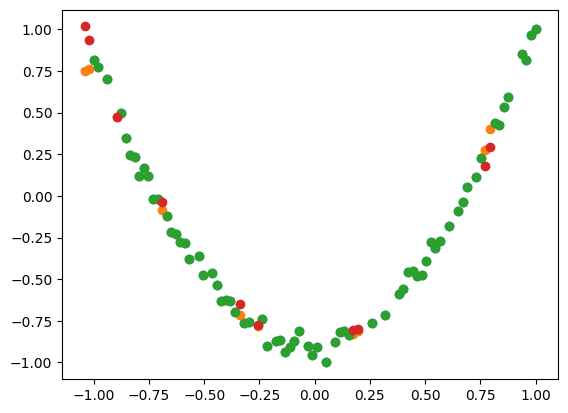

Scores saved as quadratic/0.7_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3178000450134277 seconds. 
Now scoring model... 


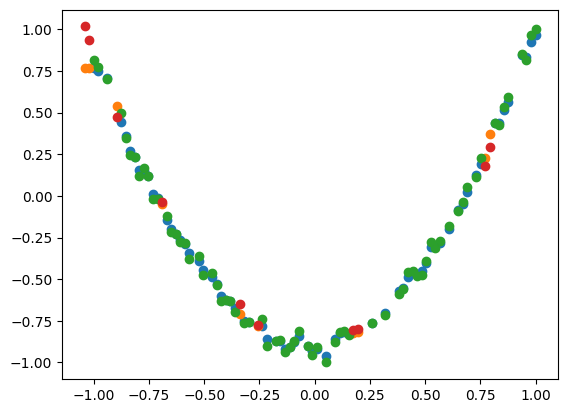

Scores saved as quadratic/0.7_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4055910110473633 seconds. 
Now scoring model... 


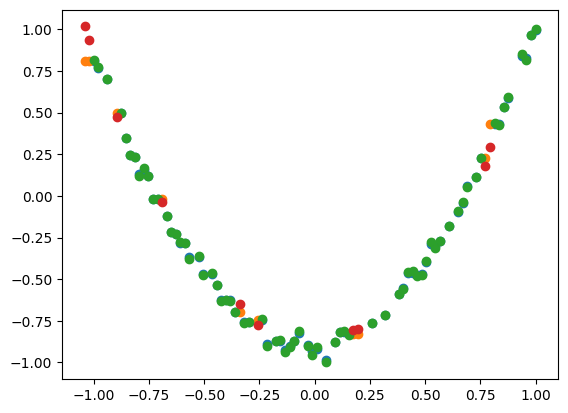

Scores saved as quadratic/0.7_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.019952058792114258 seconds. 
Now scoring model... 


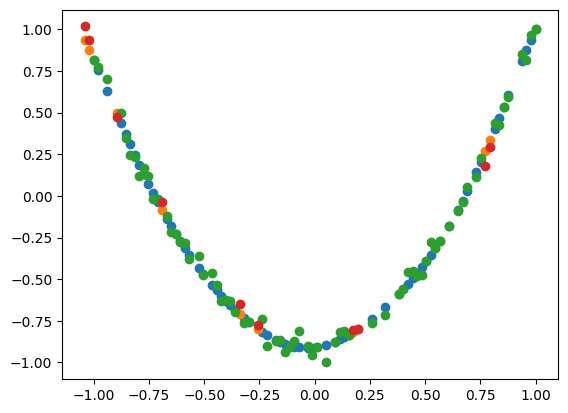

Scores saved as quadratic/0.7_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.04539799690246582 seconds. 
Now scoring model... 


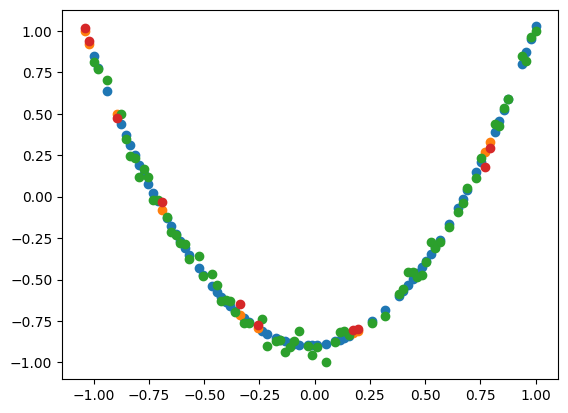

Scores saved as quadratic/0.7_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.17178988456726074 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

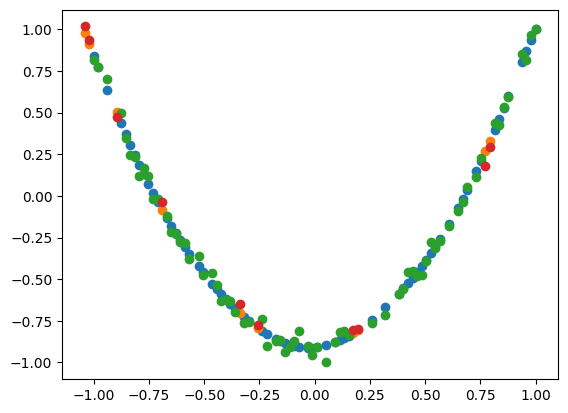

Scores saved as quadratic/0.7_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.022566795349121094 seconds. 
Now scoring model... 


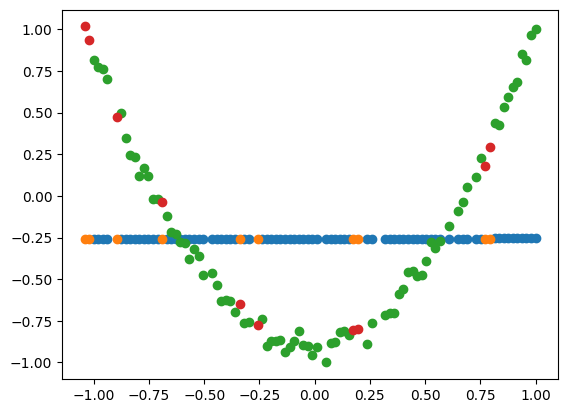

Scores saved as quadratic/0.8_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.028805971145629883 seconds. 
Now scoring model... 


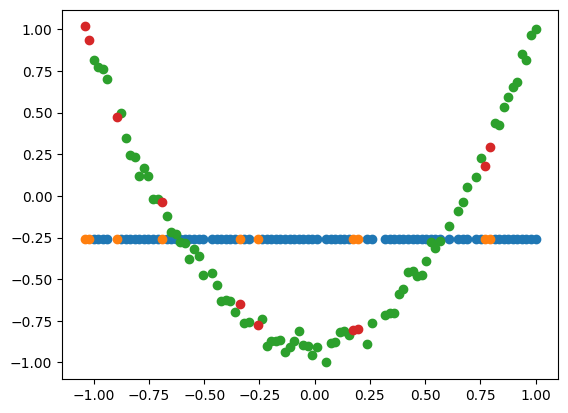

Scores saved as quadratic/0.8_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.026984214782714844 seconds. 
Now scoring model... 


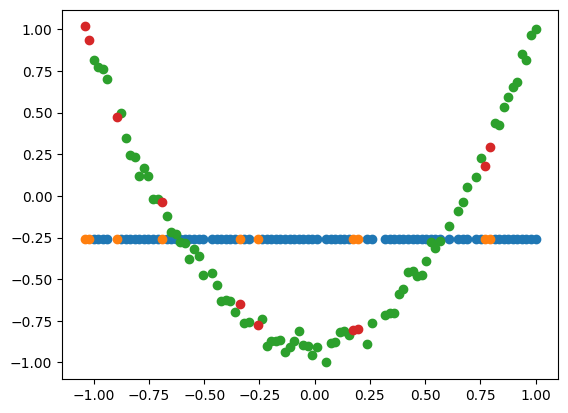

Scores saved as quadratic/0.8_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.016950130462646484 seconds. 
Now scoring model... 


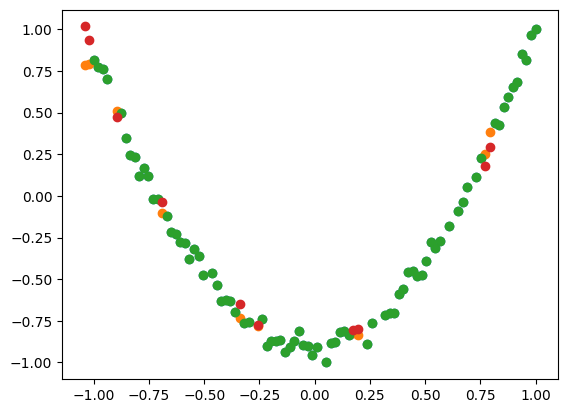

Scores saved as quadratic/0.8_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3389310836791992 seconds. 
Now scoring model... 


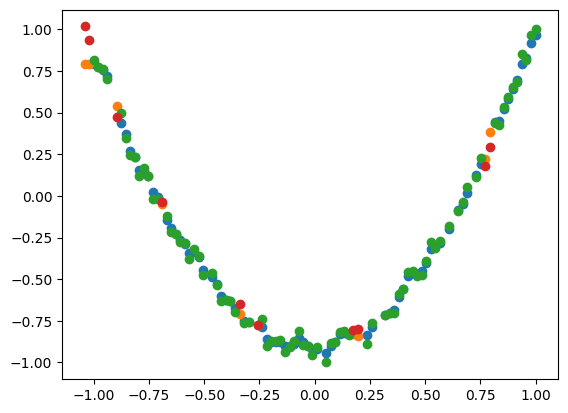

Scores saved as quadratic/0.8_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.42725491523742676 seconds. 
Now scoring model... 


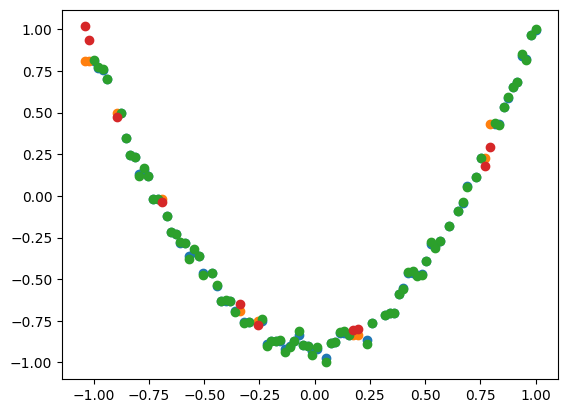

Scores saved as quadratic/0.8_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.019511938095092773 seconds. 
Now scoring model... 


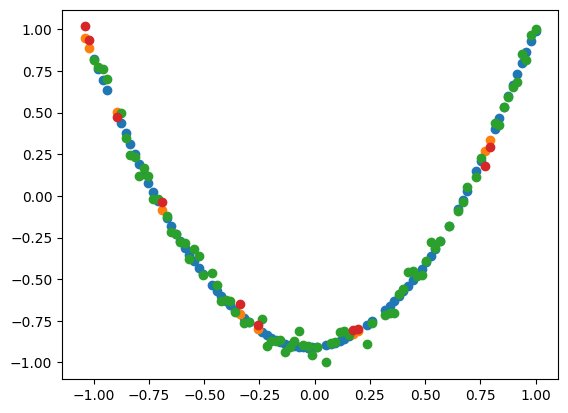

Scores saved as quadratic/0.8_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.06938982009887695 seconds. 
Now scoring model... 


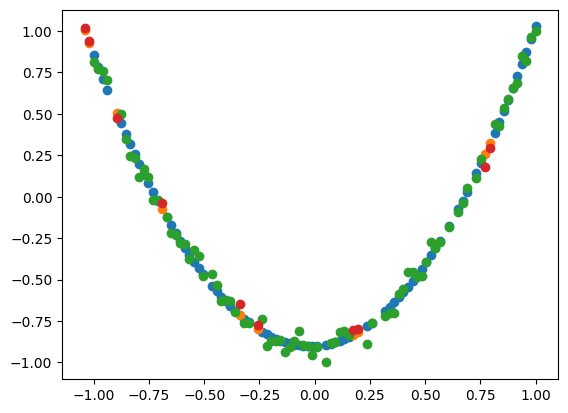

Scores saved as quadratic/0.8_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.19130277633666992 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

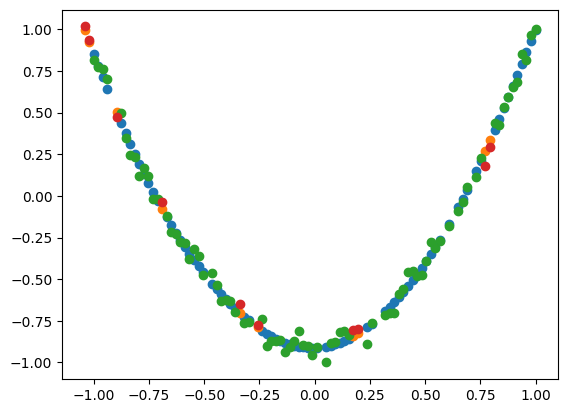

Scores saved as quadratic/0.8_gpr_scores.json. 


  0%|          | 0/5 [00:00<?, ?it/s]

Now fitting ridge... 
Completed fitting ridge in 0.027619123458862305 seconds. 
Now scoring model... 


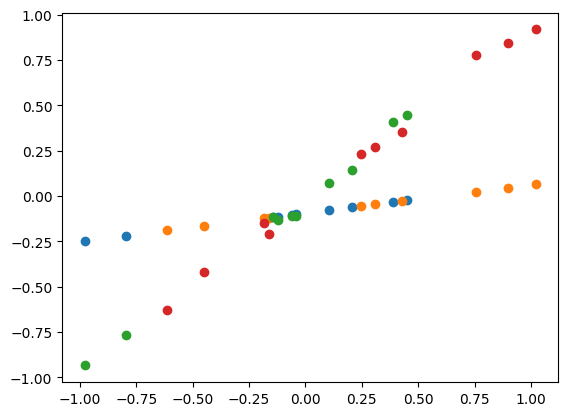

Scores saved as linear/0.1_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.012109041213989258 seconds. 
Now scoring model... 


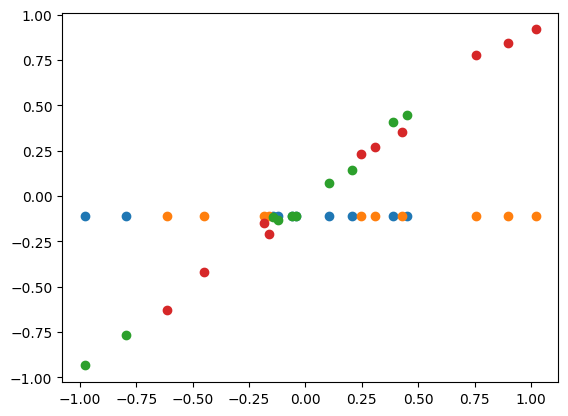

Scores saved as linear/0.1_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.02660393714904785 seconds. 
Now scoring model... 


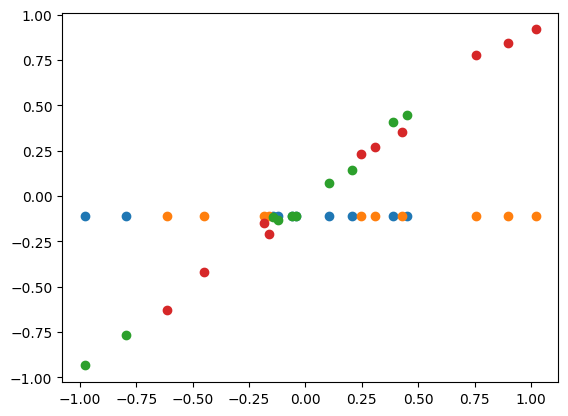

Scores saved as linear/0.1_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.018906831741333008 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/base.py", line 722, in score
    y_pred = self.predict(X)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/Users/grierjones/miniconda3

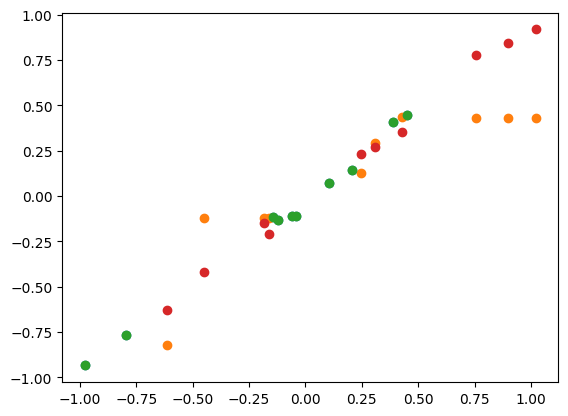

Scores saved as linear/0.1_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.1995677947998047 seconds. 
Now scoring model... 


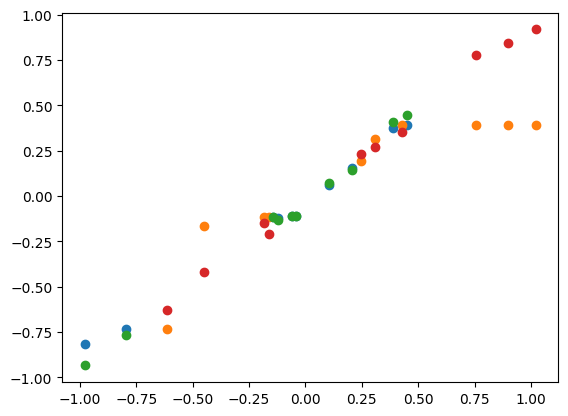

Scores saved as linear/0.1_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.3806033134460449 seconds. 
Now scoring model... 


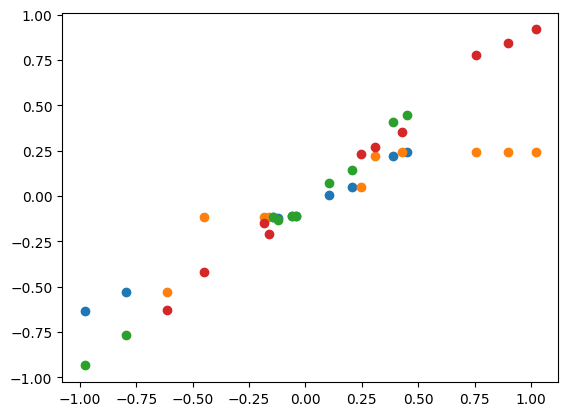

Scores saved as linear/0.1_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.01974797248840332 seconds. 
Now scoring model... 


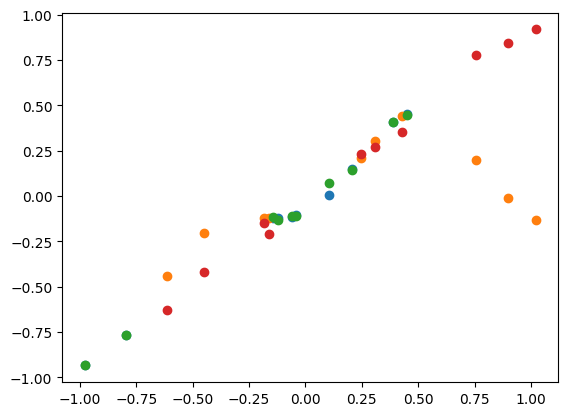

Scores saved as linear/0.1_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.03794217109680176 seconds. 
Now scoring model... 


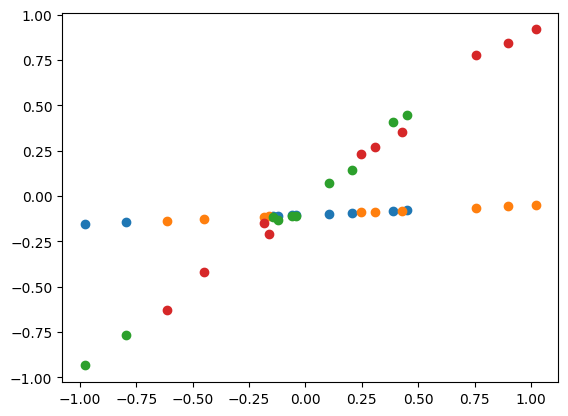

Scores saved as linear/0.1_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.014611959457397461 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


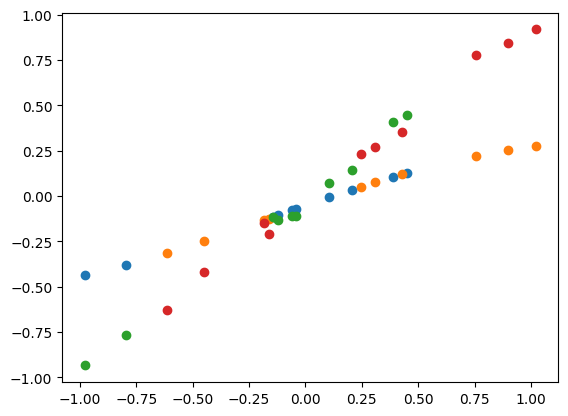

Scores saved as linear/0.1_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.024843931198120117 seconds. 
Now scoring model... 


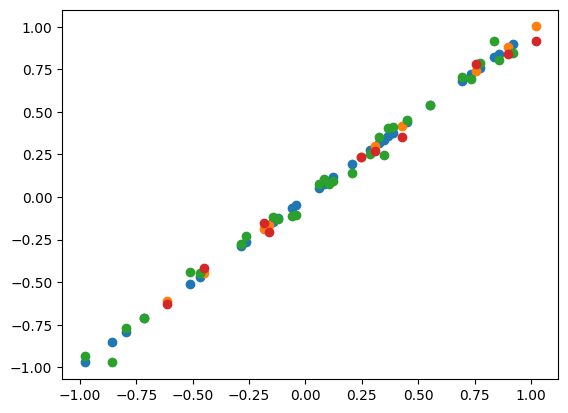

Scores saved as linear/0.3_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.027842044830322266 seconds. 
Now scoring model... 


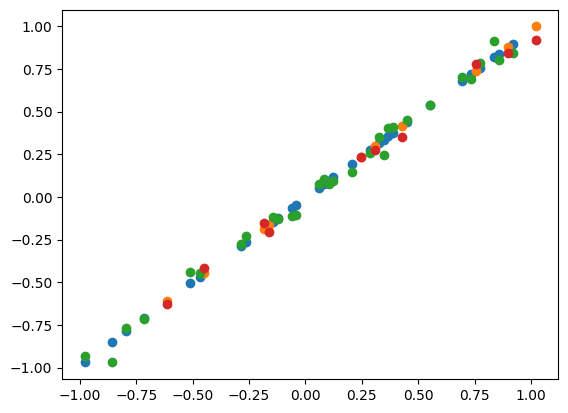

Scores saved as linear/0.3_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.027904033660888672 seconds. 
Now scoring model... 


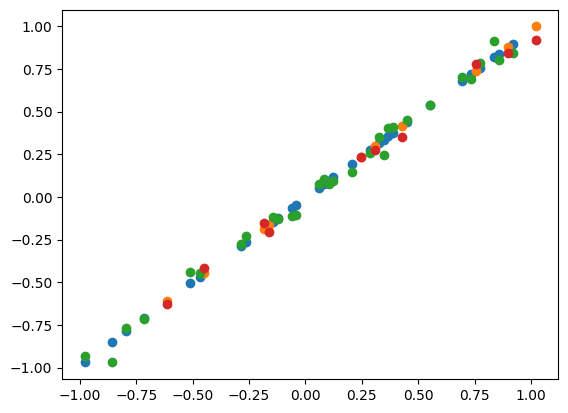

Scores saved as linear/0.3_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.01917290687561035 seconds. 
Now scoring model... 


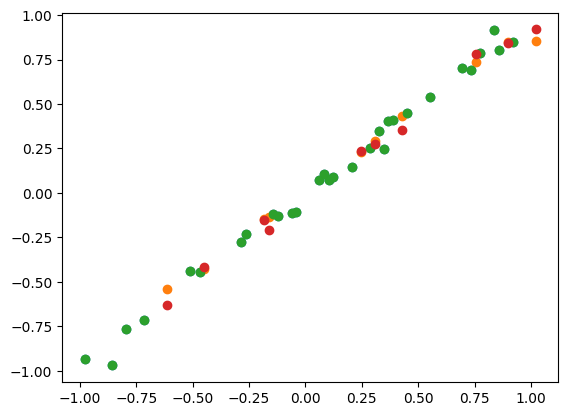

Scores saved as linear/0.3_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.294377326965332 seconds. 
Now scoring model... 


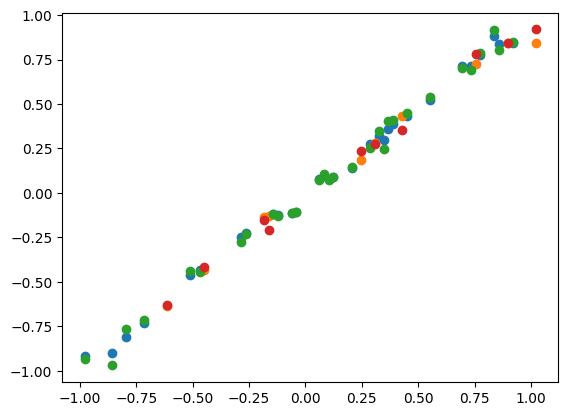

Scores saved as linear/0.3_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.3962228298187256 seconds. 
Now scoring model... 


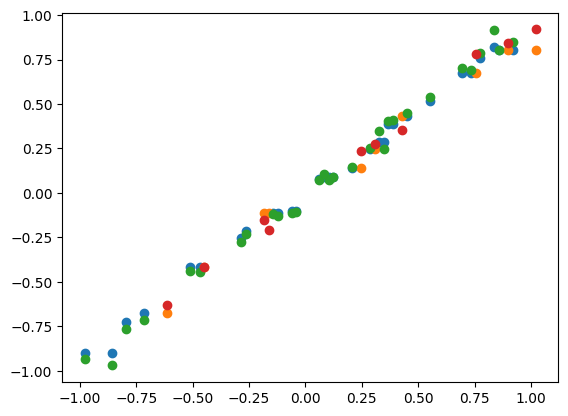

Scores saved as linear/0.3_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.017448902130126953 seconds. 
Now scoring model... 


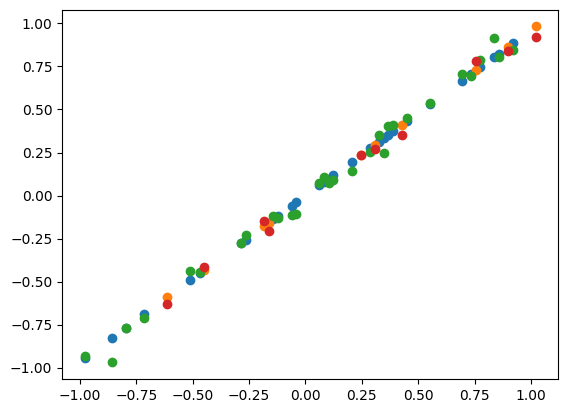

Scores saved as linear/0.3_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.03931784629821777 seconds. 
Now scoring model... 


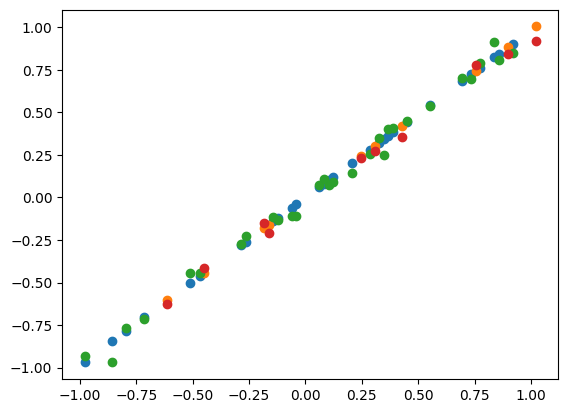

Scores saved as linear/0.3_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.014985799789428711 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

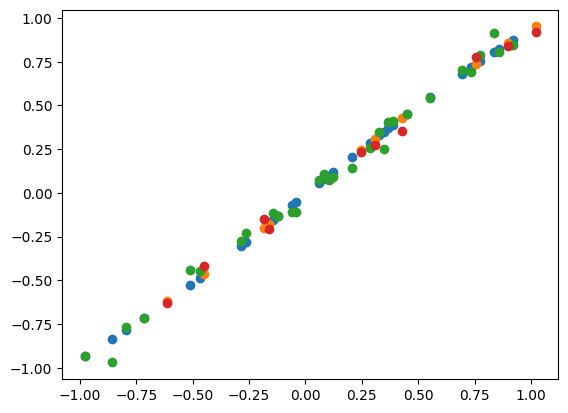

Scores saved as linear/0.3_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.02173018455505371 seconds. 
Now scoring model... 


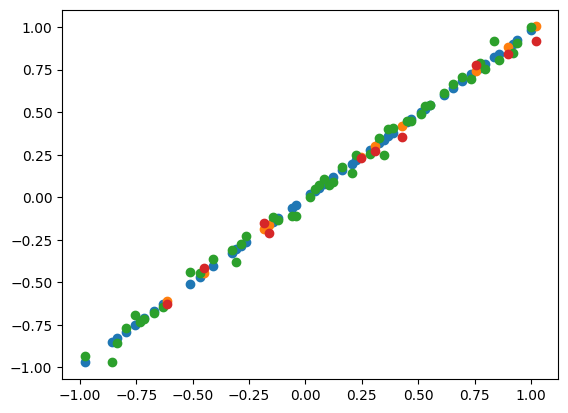

Scores saved as linear/0.5_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.015738964080810547 seconds. 
Now scoring model... 


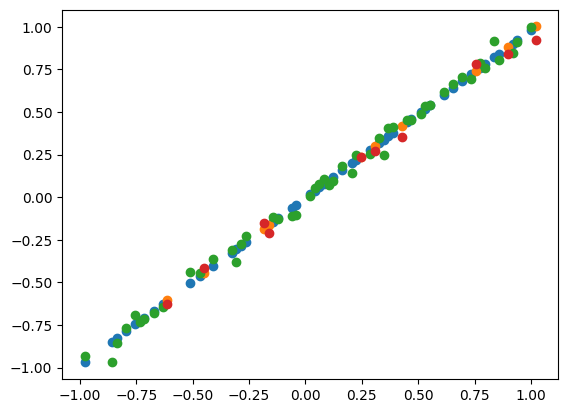

Scores saved as linear/0.5_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.027825117111206055 seconds. 
Now scoring model... 


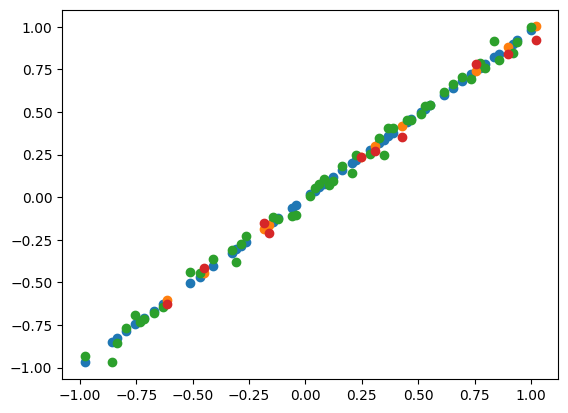

Scores saved as linear/0.5_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.015890836715698242 seconds. 
Now scoring model... 


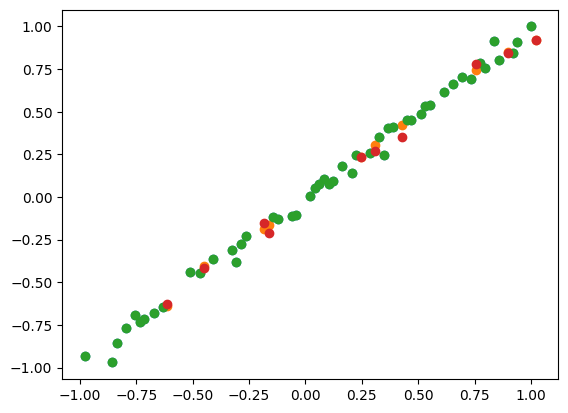

Scores saved as linear/0.5_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2939660549163818 seconds. 
Now scoring model... 


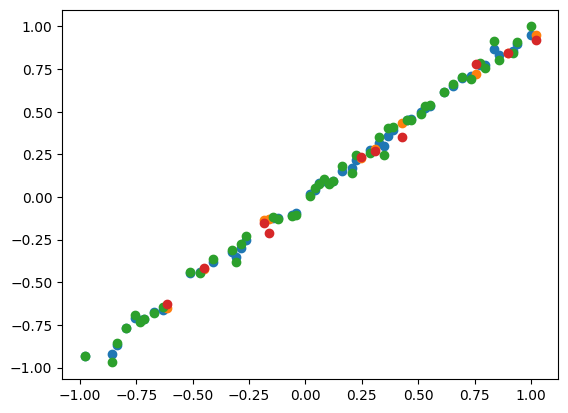

Scores saved as linear/0.5_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.40087389945983887 seconds. 
Now scoring model... 


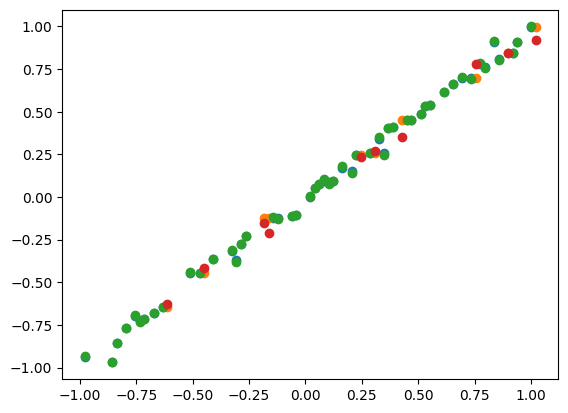

Scores saved as linear/0.5_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.01834583282470703 seconds. 
Now scoring model... 


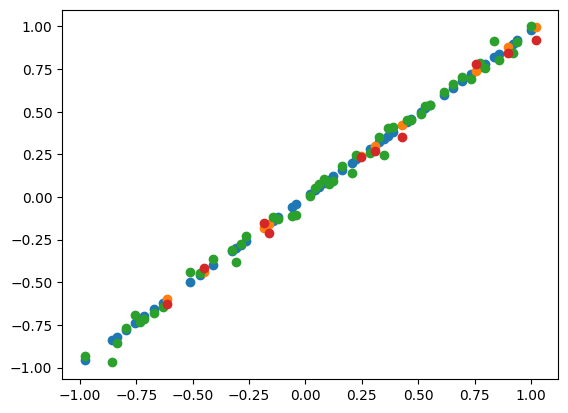

Scores saved as linear/0.5_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.0384058952331543 seconds. 
Now scoring model... 


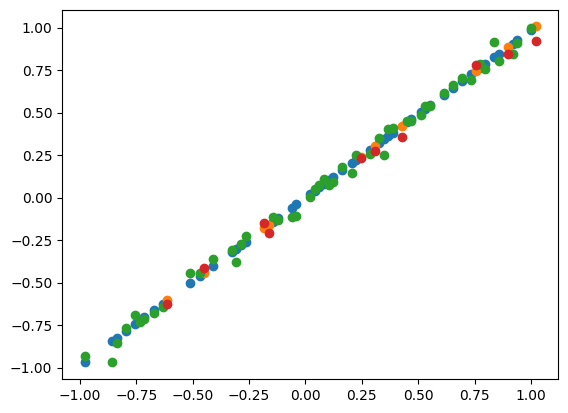

Scores saved as linear/0.5_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.04538297653198242 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

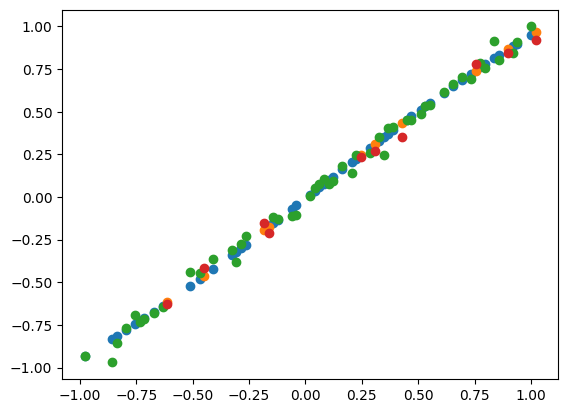

Scores saved as linear/0.5_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.020895957946777344 seconds. 
Now scoring model... 


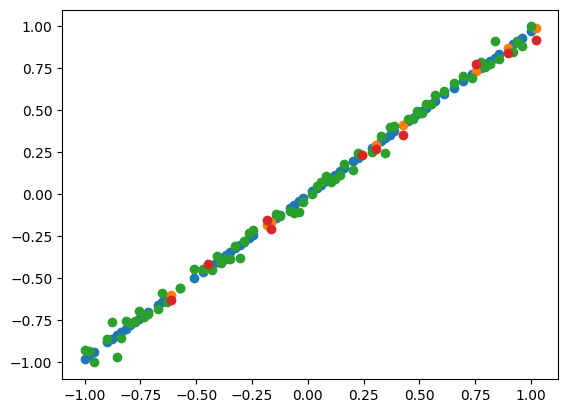

Scores saved as linear/0.7_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.021507978439331055 seconds. 
Now scoring model... 


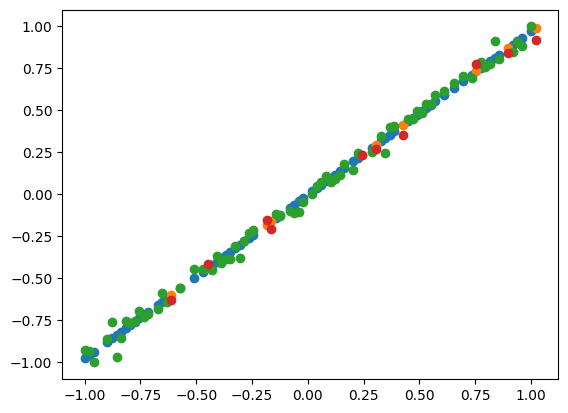

Scores saved as linear/0.7_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.026959896087646484 seconds. 
Now scoring model... 


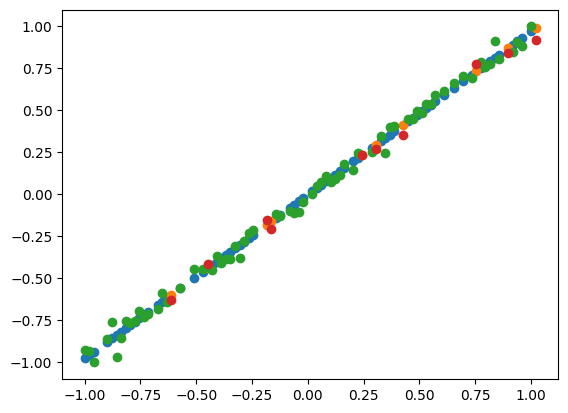

Scores saved as linear/0.7_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.01782393455505371 seconds. 
Now scoring model... 


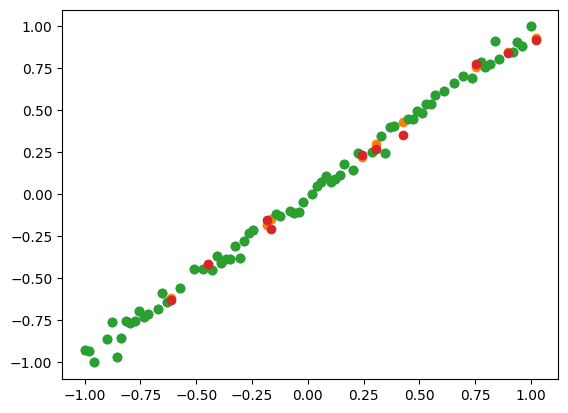

Scores saved as linear/0.7_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2966227531433105 seconds. 
Now scoring model... 


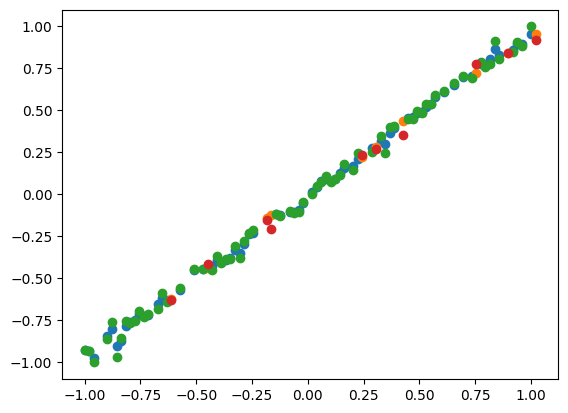

Scores saved as linear/0.7_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.41343212127685547 seconds. 
Now scoring model... 


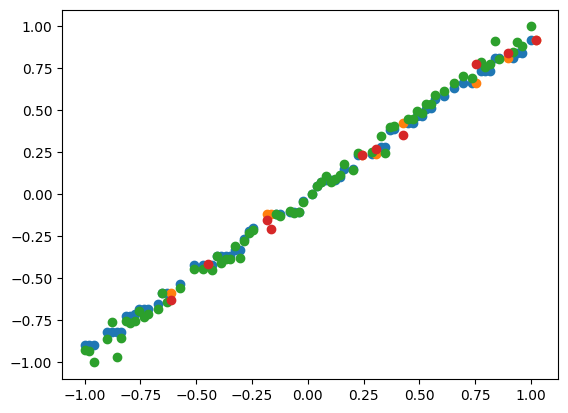

Scores saved as linear/0.7_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.018959999084472656 seconds. 
Now scoring model... 


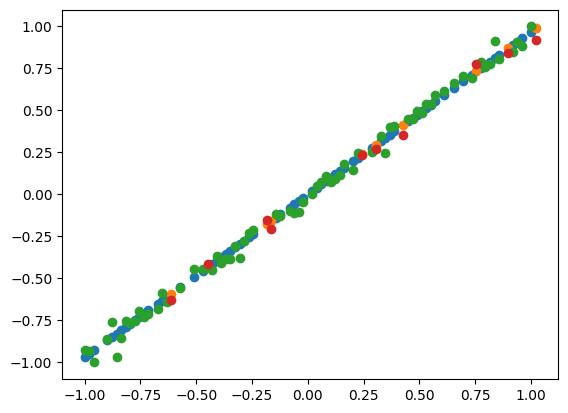

Scores saved as linear/0.7_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.04725503921508789 seconds. 
Now scoring model... 


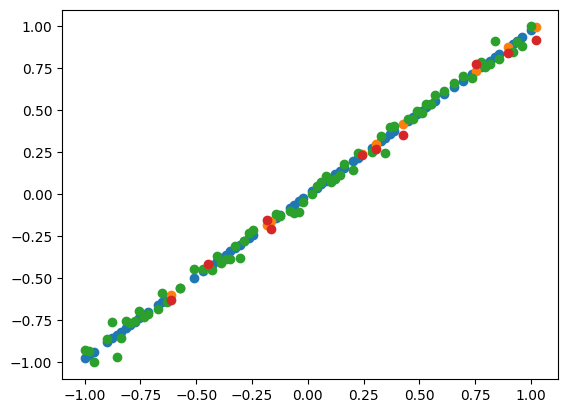

Scores saved as linear/0.7_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.16719484329223633 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


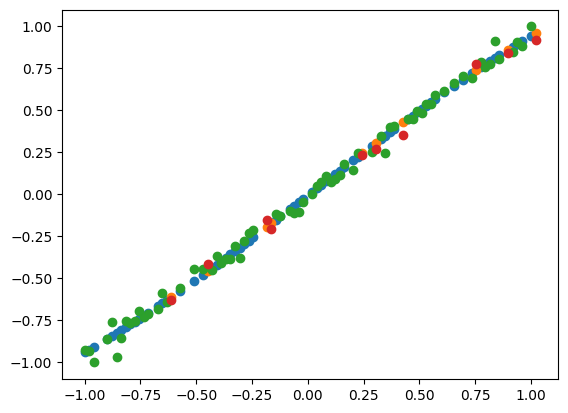

Scores saved as linear/0.7_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.01884007453918457 seconds. 
Now scoring model... 


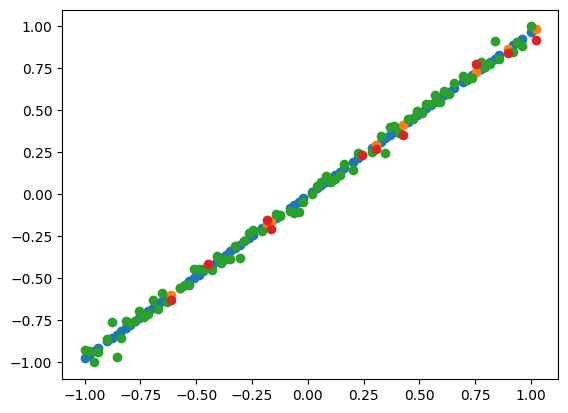

Scores saved as linear/0.8_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.028303861618041992 seconds. 
Now scoring model... 


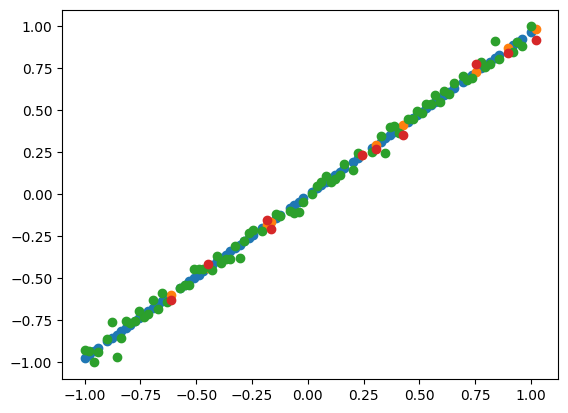

Scores saved as linear/0.8_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.02786087989807129 seconds. 
Now scoring model... 


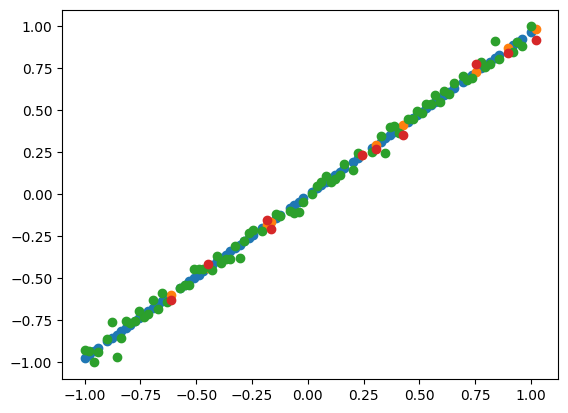

Scores saved as linear/0.8_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.018749237060546875 seconds. 
Now scoring model... 


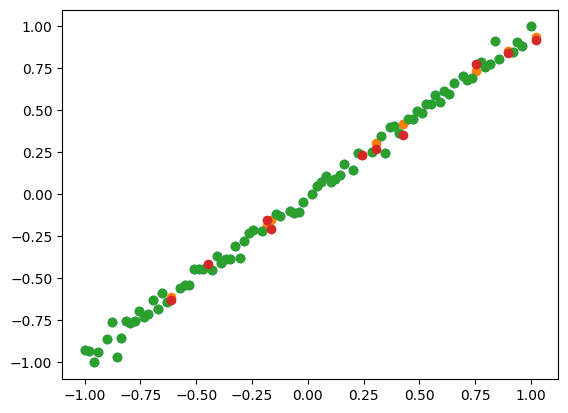

Scores saved as linear/0.8_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2816369533538818 seconds. 
Now scoring model... 


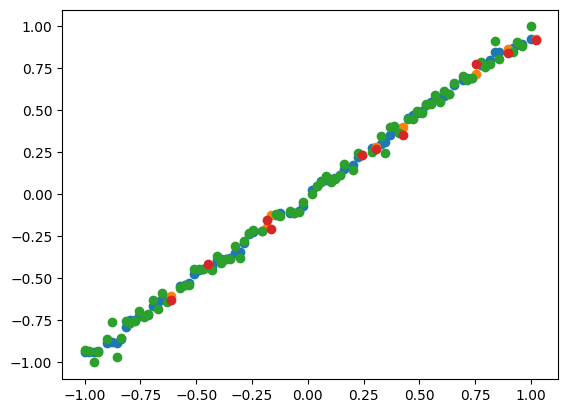

Scores saved as linear/0.8_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4325082302093506 seconds. 
Now scoring model... 


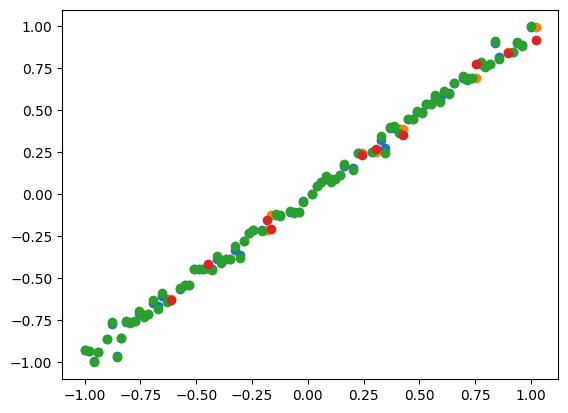

Scores saved as linear/0.8_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.01922607421875 seconds. 
Now scoring model... 


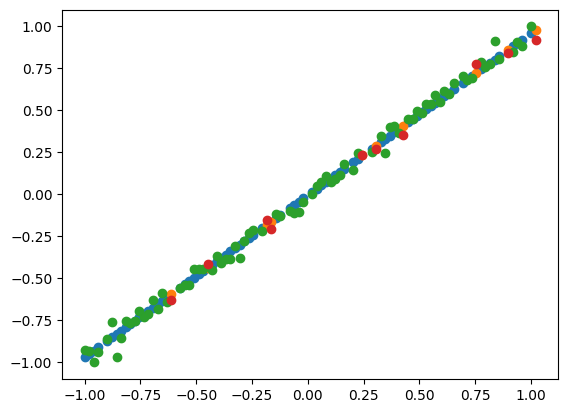

Scores saved as linear/0.8_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.09143996238708496 seconds. 
Now scoring model... 


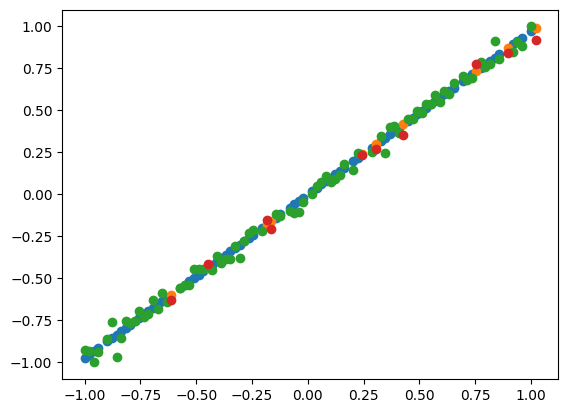

Scores saved as linear/0.8_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.15388894081115723 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


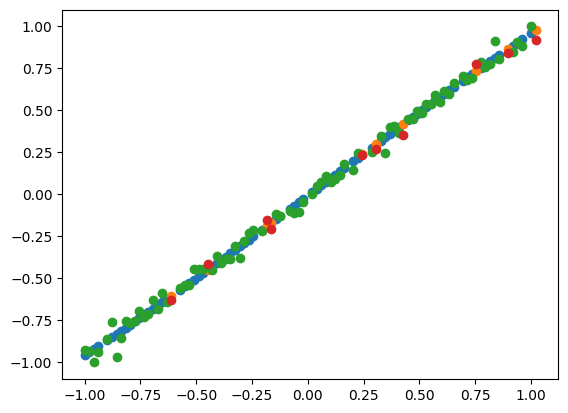

Scores saved as linear/0.8_gpr_scores.json. 


  0%|          | 0/5 [00:00<?, ?it/s]

Now fitting ridge... 
Completed fitting ridge in 0.023499011993408203 seconds. 
Now scoring model... 


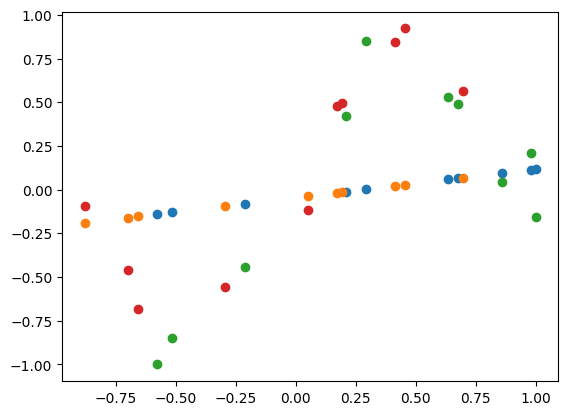

Scores saved as sine/0.1_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.012466907501220703 seconds. 
Now scoring model... 


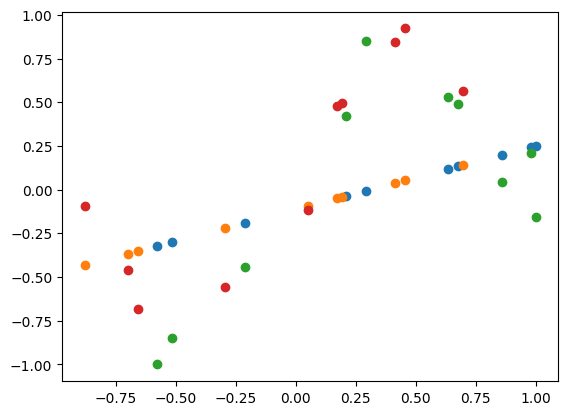

Scores saved as sine/0.1_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.027087688446044922 seconds. 
Now scoring model... 


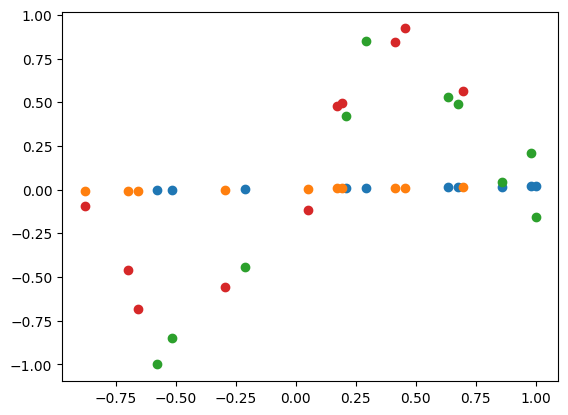

Scores saved as sine/0.1_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.019272804260253906 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/base.py", line 722, in score
    y_pred = self.predict(X)
  File "/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/Users/grierjones/miniconda3

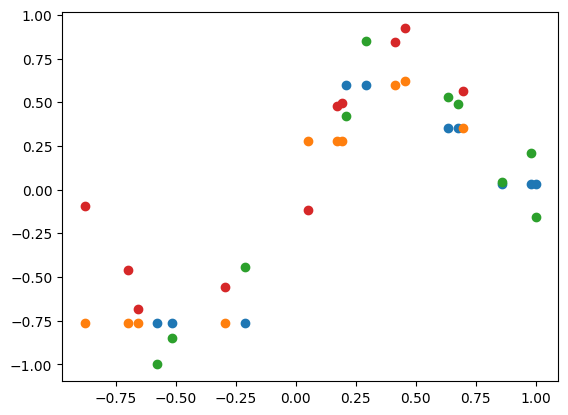

Scores saved as sine/0.1_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.323937177658081 seconds. 
Now scoring model... 


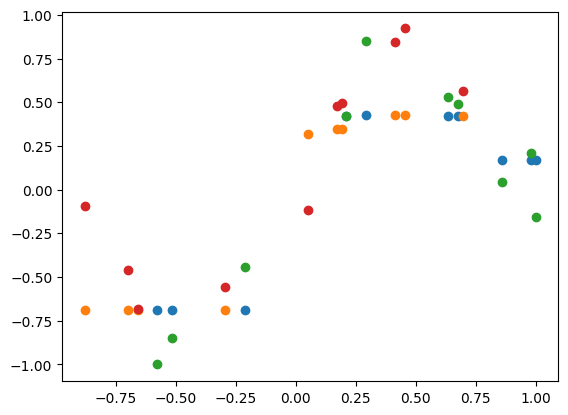

Scores saved as sine/0.1_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.3622620105743408 seconds. 
Now scoring model... 


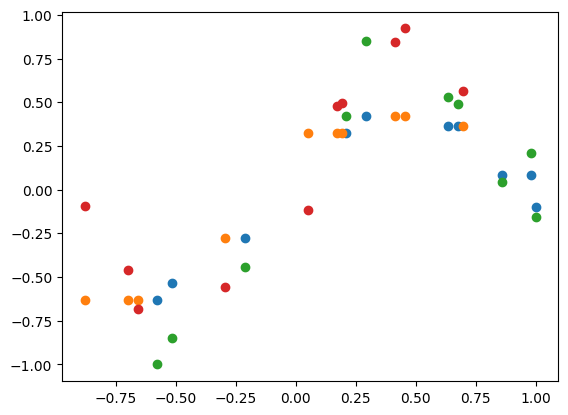

Scores saved as sine/0.1_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.016915082931518555 seconds. 
Now scoring model... 


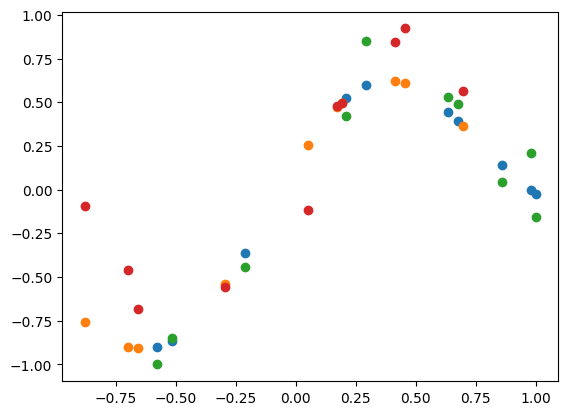

Scores saved as sine/0.1_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.03699612617492676 seconds. 
Now scoring model... 


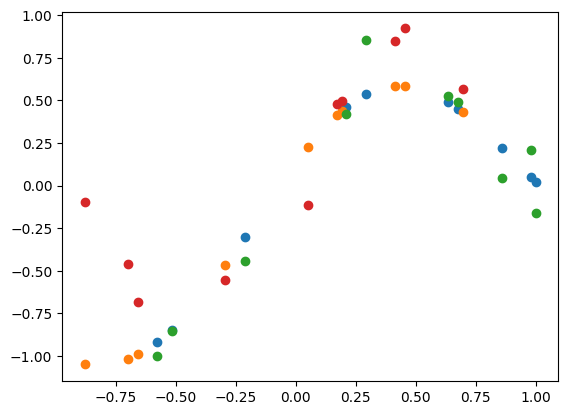

Scores saved as sine/0.1_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.014043807983398438 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

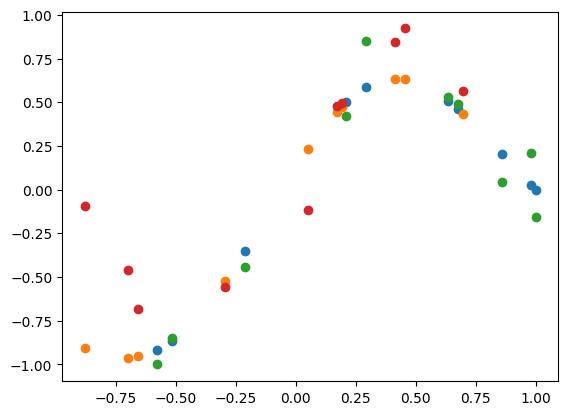

Scores saved as sine/0.1_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.02368903160095215 seconds. 
Now scoring model... 


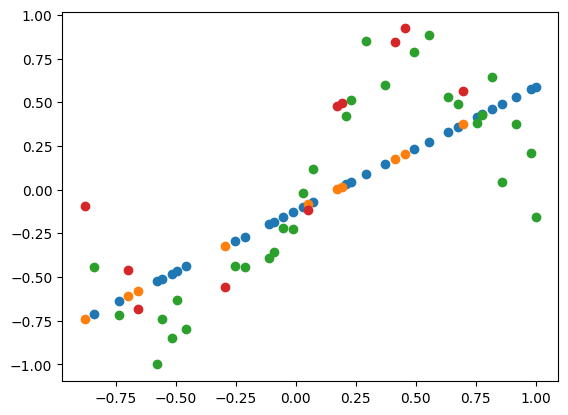

Scores saved as sine/0.3_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.03026103973388672 seconds. 
Now scoring model... 


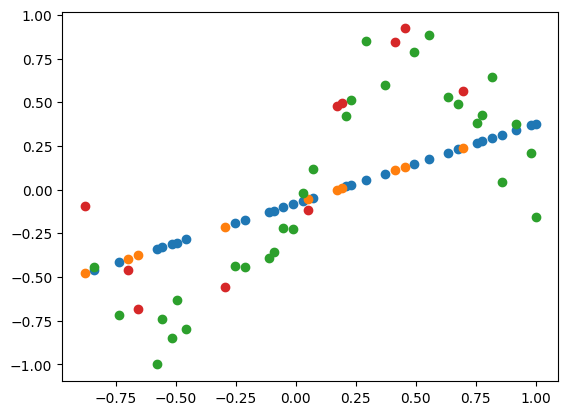

Scores saved as sine/0.3_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.027393102645874023 seconds. 
Now scoring model... 


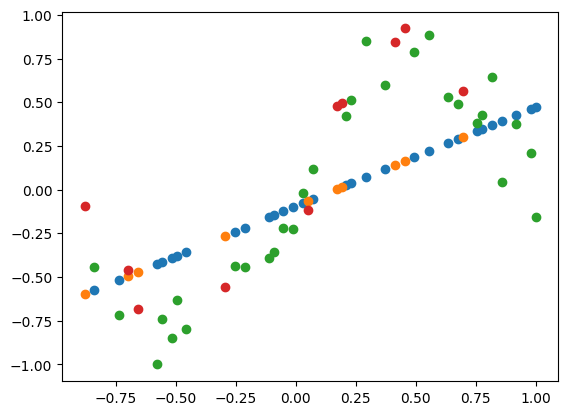

Scores saved as sine/0.3_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.01780390739440918 seconds. 
Now scoring model... 


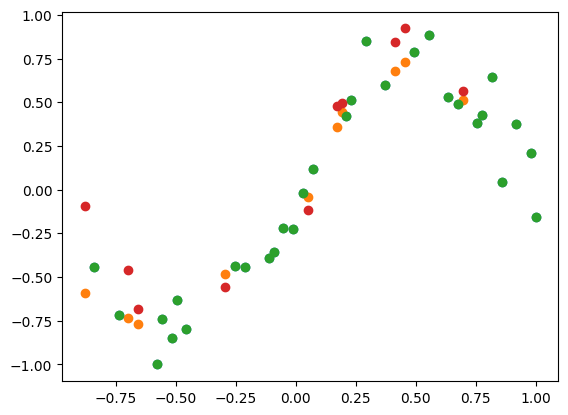

Scores saved as sine/0.3_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2692749500274658 seconds. 
Now scoring model... 


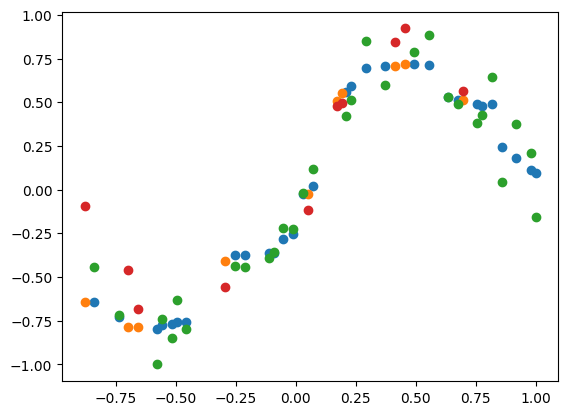

Scores saved as sine/0.3_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.39861392974853516 seconds. 
Now scoring model... 


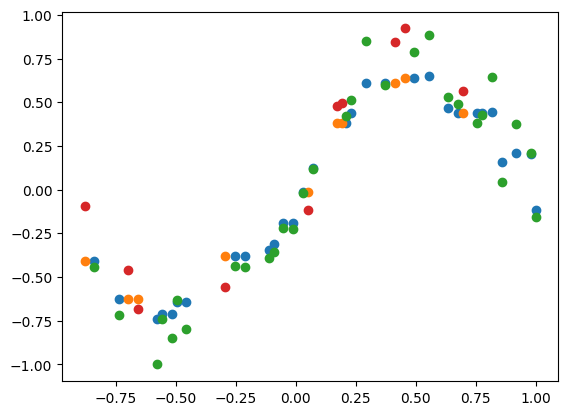

Scores saved as sine/0.3_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.016973018646240234 seconds. 
Now scoring model... 


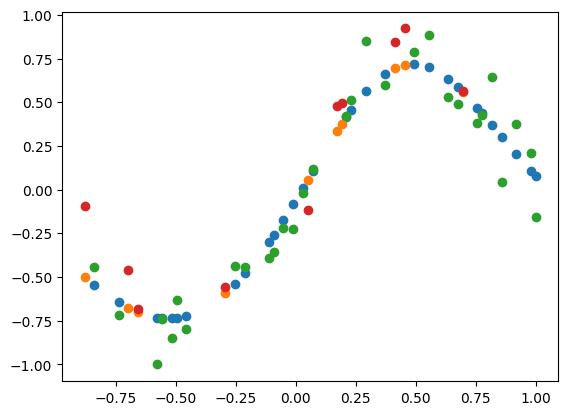

Scores saved as sine/0.3_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.07327985763549805 seconds. 
Now scoring model... 


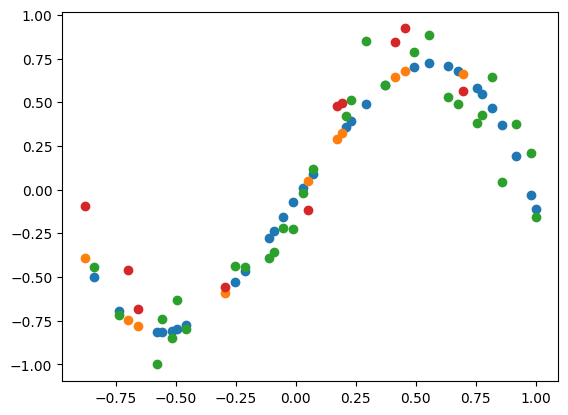

Scores saved as sine/0.3_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.015115976333618164 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

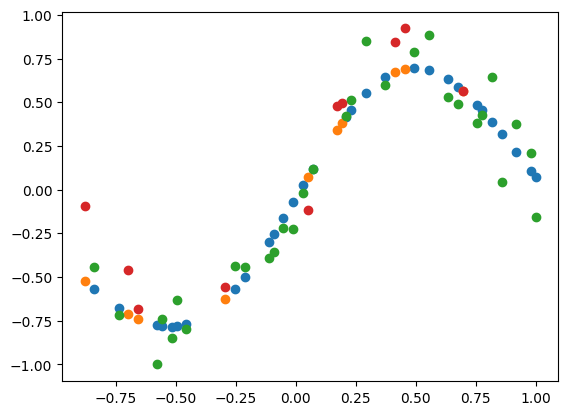

Scores saved as sine/0.3_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.02249002456665039 seconds. 
Now scoring model... 


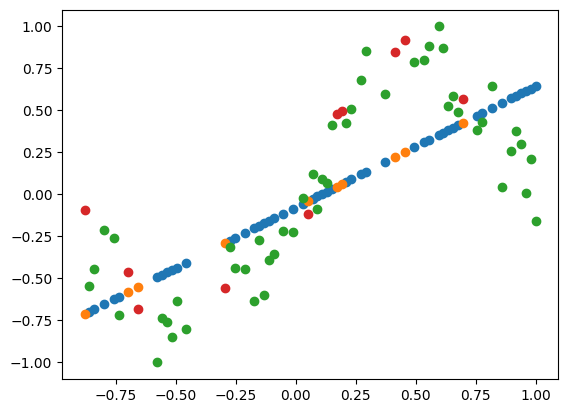

Scores saved as sine/0.5_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.023941993713378906 seconds. 
Now scoring model... 


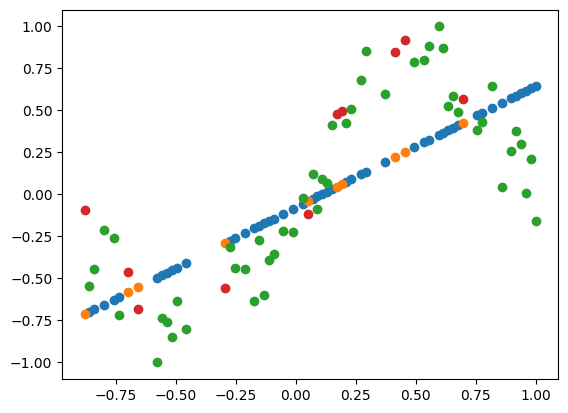

Scores saved as sine/0.5_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.026330232620239258 seconds. 
Now scoring model... 


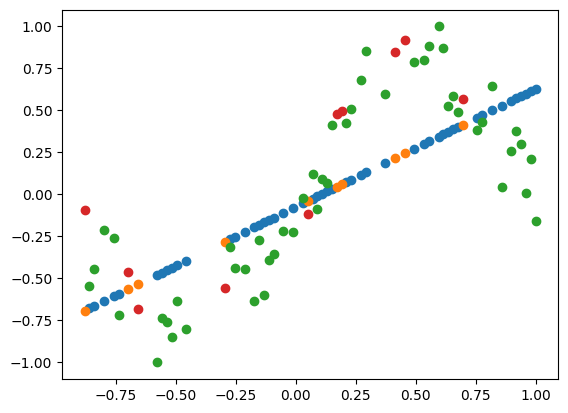

Scores saved as sine/0.5_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.0178070068359375 seconds. 
Now scoring model... 


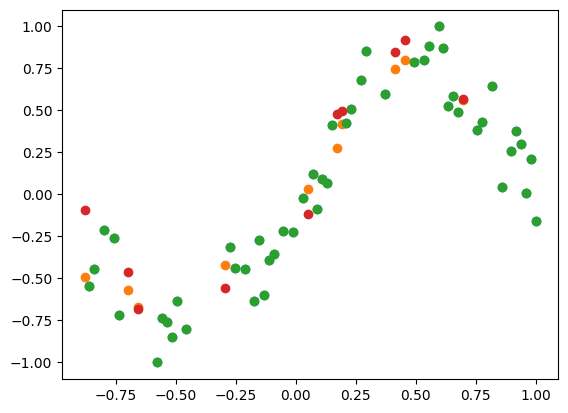

Scores saved as sine/0.5_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2128558158874512 seconds. 
Now scoring model... 


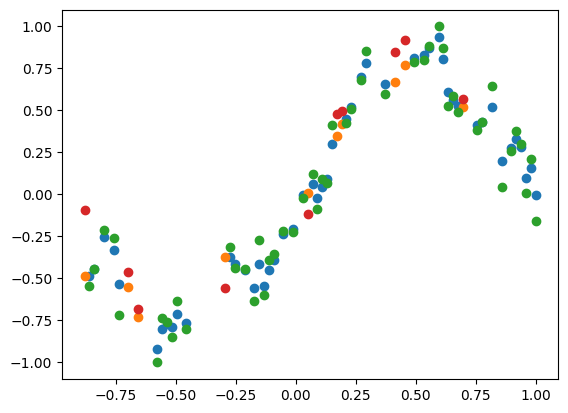

Scores saved as sine/0.5_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.38095903396606445 seconds. 
Now scoring model... 


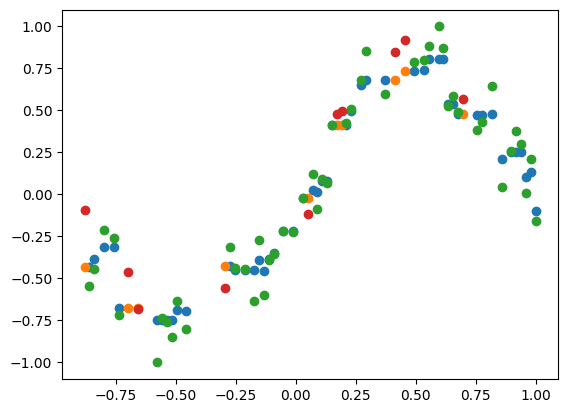

Scores saved as sine/0.5_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.019898176193237305 seconds. 
Now scoring model... 


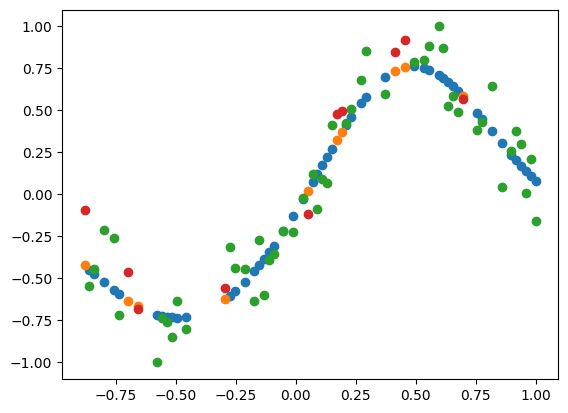

Scores saved as sine/0.5_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.03914928436279297 seconds. 
Now scoring model... 


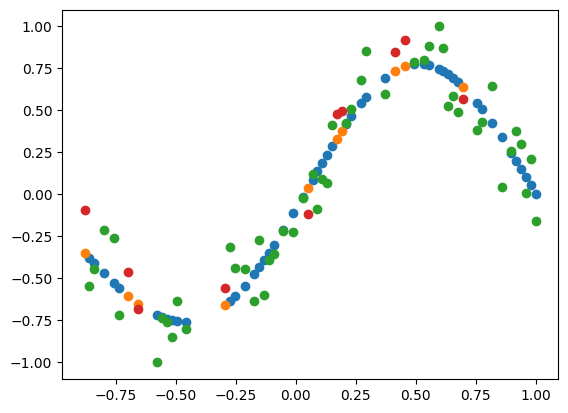

Scores saved as sine/0.5_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.049761056900024414 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

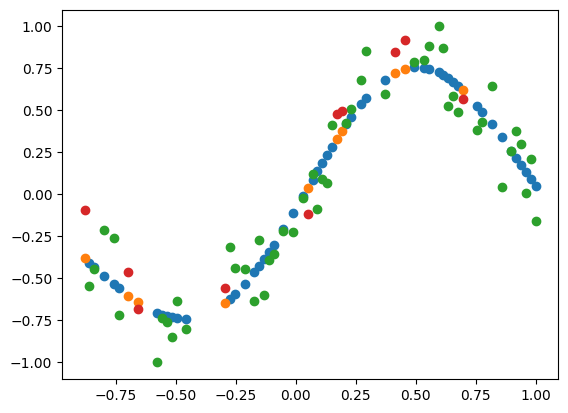

Scores saved as sine/0.5_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.022373199462890625 seconds. 
Now scoring model... 


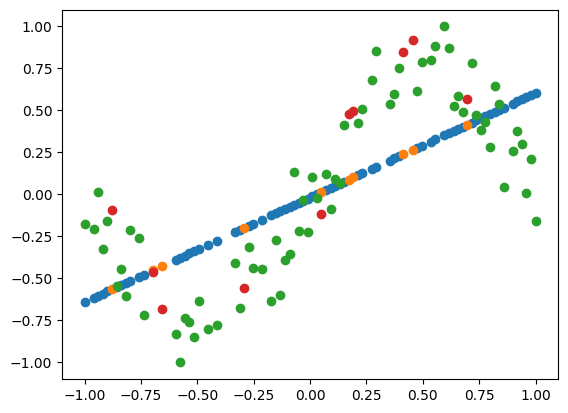

Scores saved as sine/0.7_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.02077198028564453 seconds. 
Now scoring model... 


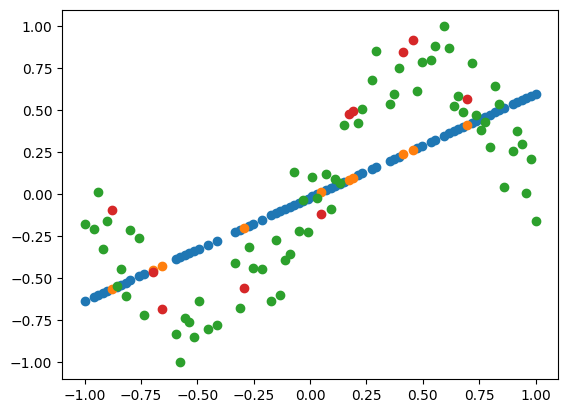

Scores saved as sine/0.7_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.02833080291748047 seconds. 
Now scoring model... 


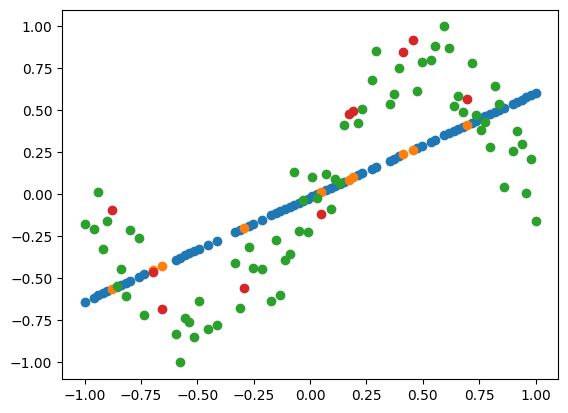

Scores saved as sine/0.7_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.0175020694732666 seconds. 
Now scoring model... 


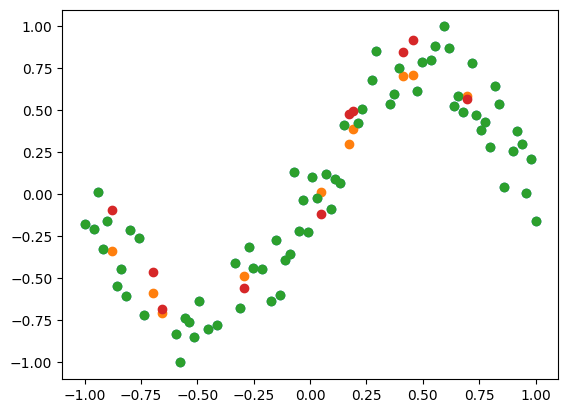

Scores saved as sine/0.7_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.3264269828796387 seconds. 
Now scoring model... 


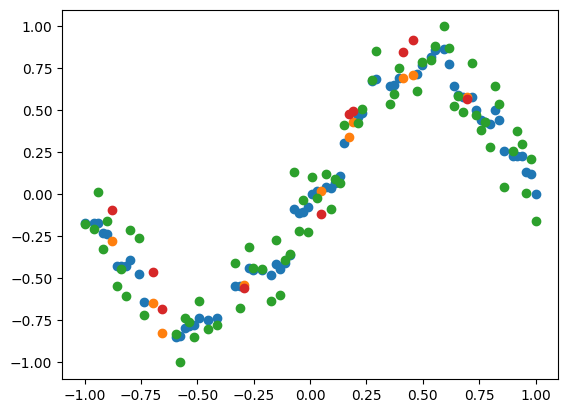

Scores saved as sine/0.7_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.4119837284088135 seconds. 
Now scoring model... 


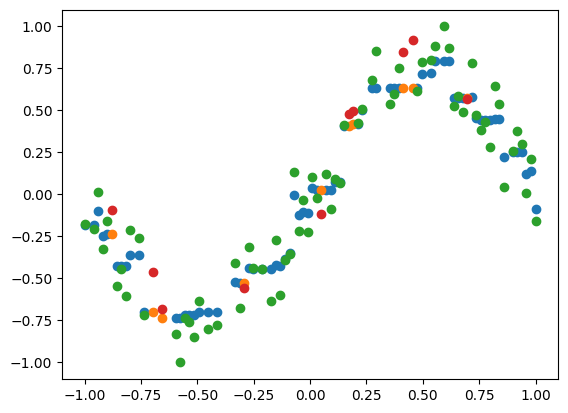

Scores saved as sine/0.7_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.020745038986206055 seconds. 
Now scoring model... 


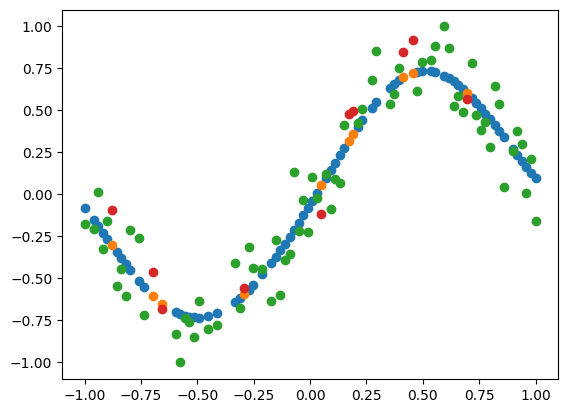

Scores saved as sine/0.7_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.0833442211151123 seconds. 
Now scoring model... 


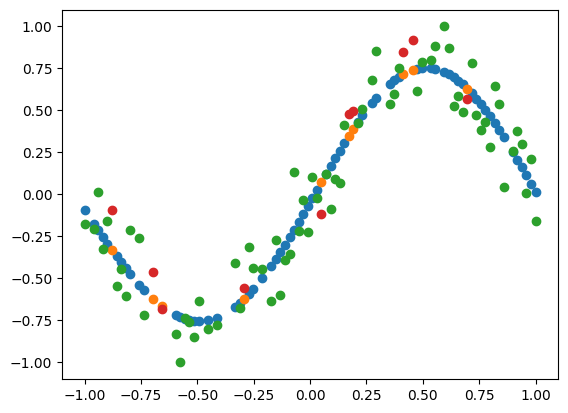

Scores saved as sine/0.7_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.15634489059448242 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

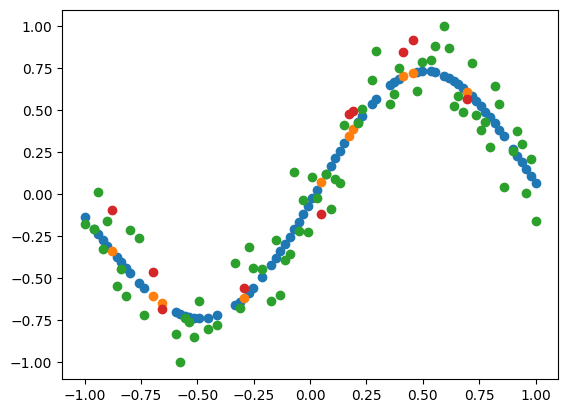

Scores saved as sine/0.7_gpr_scores.json. 
Now fitting ridge... 
Completed fitting ridge in 0.027821063995361328 seconds. 
Now scoring model... 


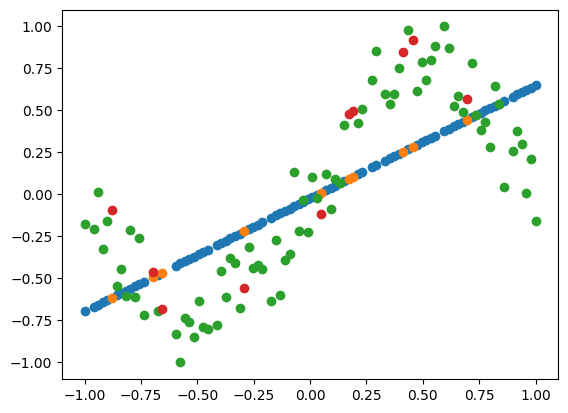

Scores saved as sine/0.8_ridge_scores.json. 
Now fitting lasso... 
Completed fitting lasso in 0.012897014617919922 seconds. 
Now scoring model... 


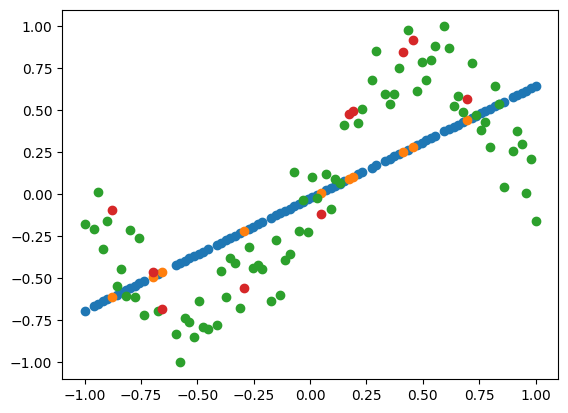

Scores saved as sine/0.8_lasso_scores.json. 
Now fitting elastic... 
Completed fitting elastic in 0.02813887596130371 seconds. 
Now scoring model... 


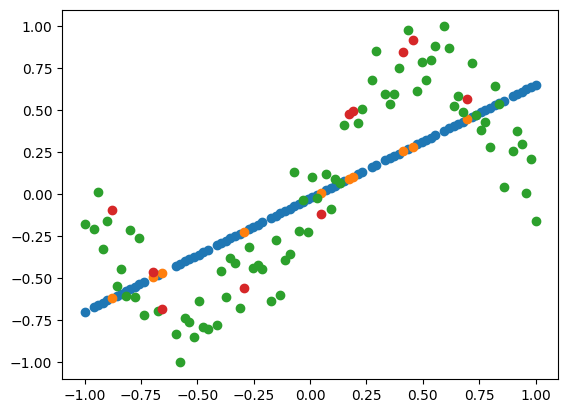

Scores saved as sine/0.8_elastic_scores.json. 
Now fitting knn... 
Completed fitting knn in 0.01682305335998535 seconds. 
Now scoring model... 


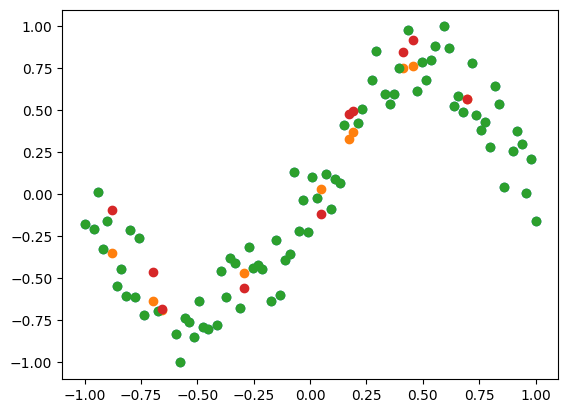

Scores saved as sine/0.8_knn_scores.json. 
Now fitting rfr... 
Completed fitting rfr in 1.2061278820037842 seconds. 
Now scoring model... 


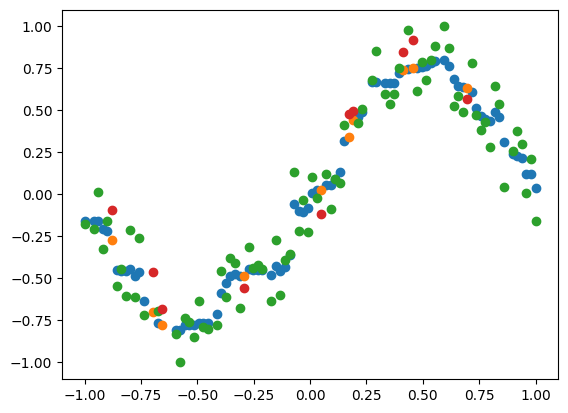

Scores saved as sine/0.8_rfr_scores.json. 
Now fitting grad... 
Completed fitting grad in 0.402634859085083 seconds. 
Now scoring model... 


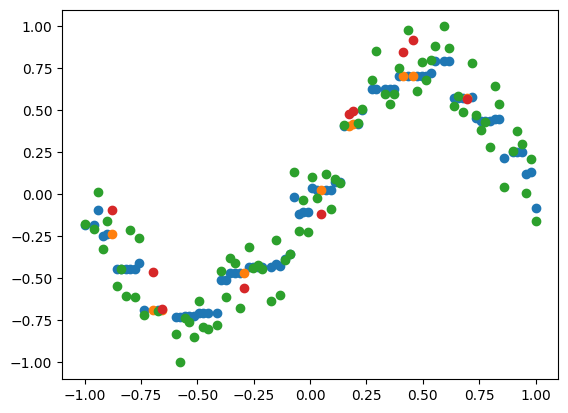

Scores saved as sine/0.8_grad_scores.json. 
Now fitting svr... 
Completed fitting svr in 0.018818140029907227 seconds. 
Now scoring model... 


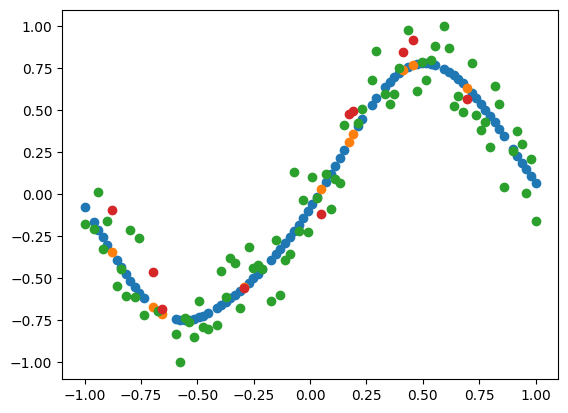

Scores saved as sine/0.8_svr_scores.json. 
Now fitting krr... 
Completed fitting krr in 0.04625201225280762 seconds. 
Now scoring model... 


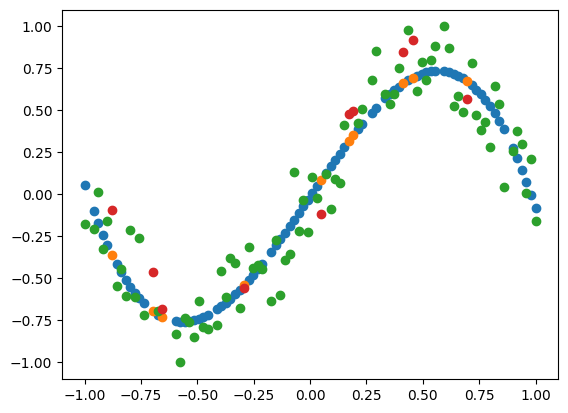

Scores saved as sine/0.8_krr_scores.json. 
Now fitting gpr... 
Completed fitting gpr in 0.14441800117492676 seconds. 
Now scoring model... 


/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/miniconda3/envs/qchem/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/grierjones/minicon

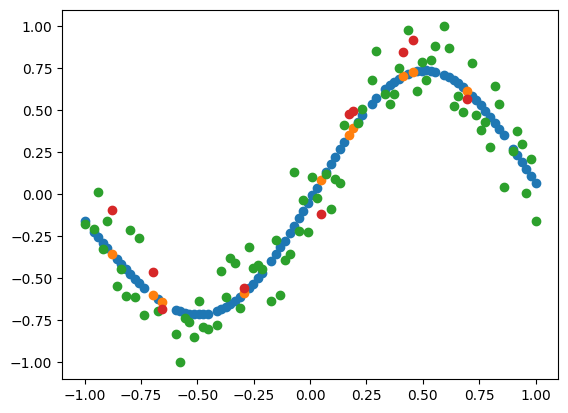

Scores saved as sine/0.8_gpr_scores.json. 


In [7]:
# Loop over function dirs and training set sizes 
# At the end of the loop save the scores
performance={}
for d in tqdm(dirs):
    performance[d]={}
    for ts in tqdm(trainsize):
        
        if ts==0.8:
            trainpath=f"/Users/grierjones/qregress/function-calc-test/{d}/{d}_train.bin"
        else:
            trainpath=f"/Users/grierjones/qregress/function-calc-test/{d}/{ts}_{d}_train.bin"
            
        with open(f"/Users/grierjones/qregress/function-calc-test/{d}/{d}_test.bin",'rb') as f:
            testdata=joblib.load(f)
            
        if os.path.exists(trainpath):
            with open(trainpath,'rb') as f:
                traindata=joblib.load(f)
                
        X_train=traindata['X'].reshape(-1,1)
        y_train=traindata['y'].reshape(-1,)
        X_test=testdata['X'].reshape(-1,1)
        y_test=testdata['y'].reshape(-1,)       

        performance[d][ts]={}
        for model in models.keys():
            scores=gridsearch(model,X_train, y_train,X_test,y_test)
            performance[d][ts][model]=scores

            # Save scores to json
            with open(os.path.join(d,f"{ts}_{model}_scores.json"), 'w') as outfile:
                json.dump(scores, outfile)
                print(f'Scores saved as {outfile.name}. ')

# Help determine best machine learning models

In [8]:
def find_best(function):
    """
    Parameters
    ----------
    function: str

    returns
    -------
    best: tuple
        (model, count)
    """
    dfmelt=[]
    for k,v in performance[function].items():
        df=pd.DataFrame.from_dict(v).loc[['R2_train','R2_test']].T
        df.columns=[df.columns,[k,k]]
        dfmelt.append(df.melt(value_vars=df.columns.tolist(),ignore_index=False))
    dfmelt=pd.concat(dfmelt)
    
    pivottable=dfmelt.reset_index().pivot_table(index=['index','variable_1'], columns='variable_0').astype(float).T
    
    stackedstats=[]
    for c in pivottable.columns.levels[0]:
        dsc=pivottable[c].T.describe().loc[['mean','min','max']]
        dsc=dsc.rename(columns={'value':c})
        stackedstats.append(dsc.T.mean().to_frame().rename(columns={0:c}))
    stackedstats=pd.concat(stackedstats,axis=1)
    
    best=stackedstats.T.idxmax()

    return best

In [9]:
bestdf=pd.DataFrame.from_dict({k: find_best(k) for k,v in performance.items()}).sort_index()

In [10]:
bestdf

quadratic linear sine
max        svr    knn  knn
mean       krr    knn  knn
min        krr    knn  svr

In [11]:
bestdf.to_excel('best.xlsx')

In [108]:
def save_bar(name):
    meltdef=[]
    for k,v in performance[name].items():
        for k1,v1 in v.items():
            for k2,v2 in v1.items():
                if "R2" in k2:
                    meltdef.append((k,k1,k2.replace('R2','R$^{2}$').replace('_',' '),v2))
                    
    df=pd.DataFrame(meltdef,columns=['Train','Model','Metric','Score'])

    BIGGER_SIZE = 12
    
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    
    sns.set_theme(style='white')

    g=sns.catplot(
        df, kind="bar",
        x="Train", y="Score", col="Model", hue='Metric',
        height=3.5, aspect=1, col_wrap=5,palette=sns.color_palette("Paired",2)
    )
    # g.fig.set_size_inches(20,50)
    # extract the matplotlib axes_subplot objects from the FacetGrid
    for ax in g.axes.ravel():
        ax.set_title(ax.get_title(),y=2,pad=1e3)
        # , y=1.0, pad=
        # iterate through the axes containers
        for c in ax.containers:
            ax.bar_label(c, fmt='{:.2f}')

    
    g.set_axis_labels("Training Set Ratio", "R$^{2}$")
    g.set_titles("{col_var}={col_name}")
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    g.set(ylim=(0, 1))
    g.fig.suptitle(f"{name}".capitalize())
    # plt.title(f"{name}")
    plt.tight_layout()
    plt.savefig(f'{name}.png',dpi=300,bbox_inches='tight')
    plt.show()

quadratic


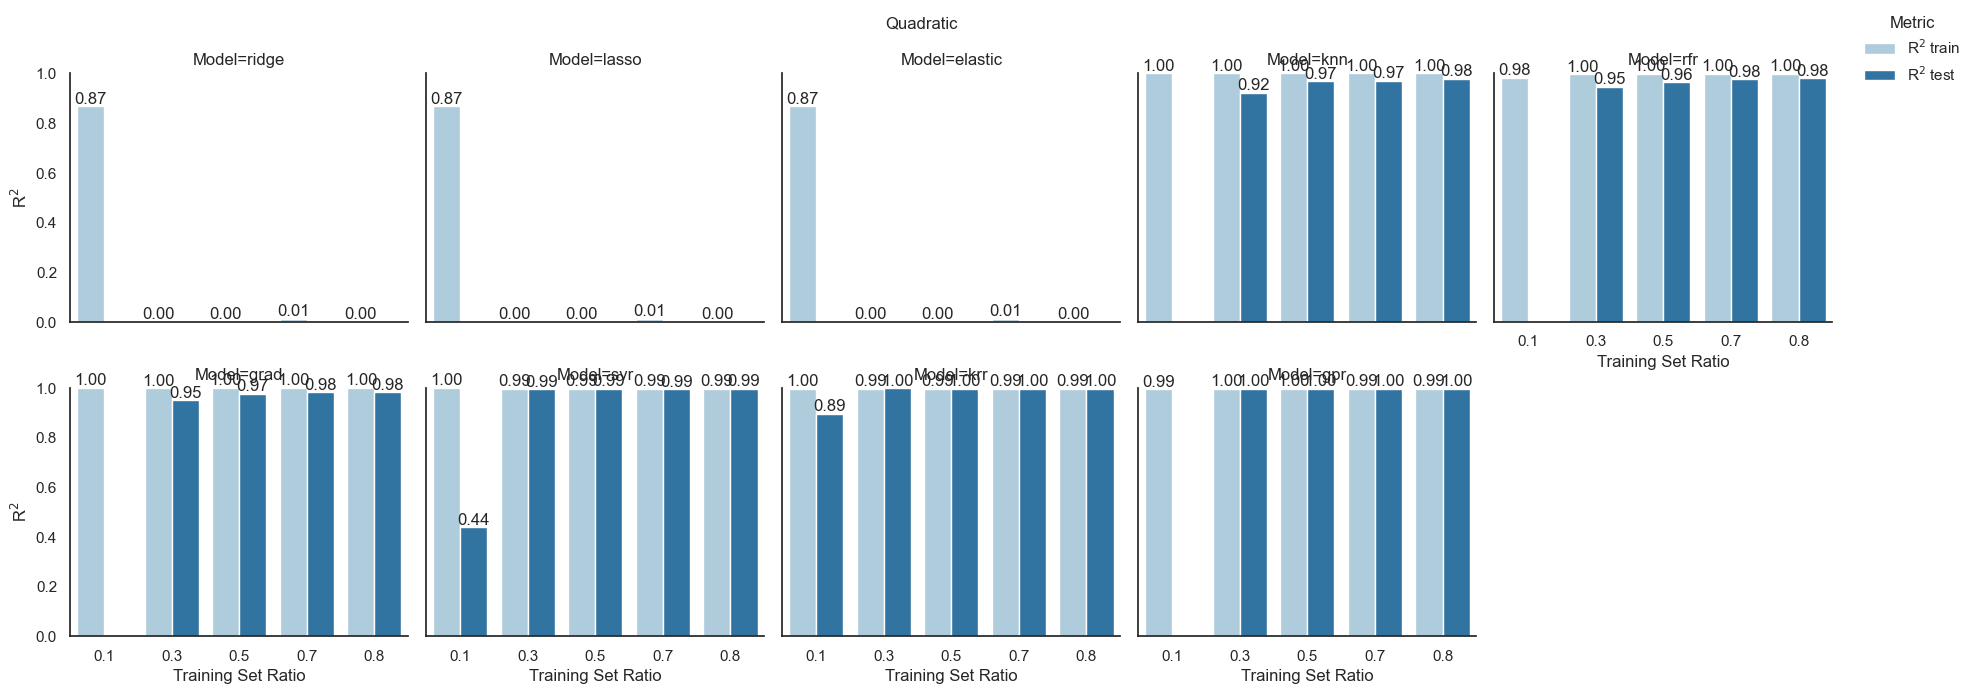

linear


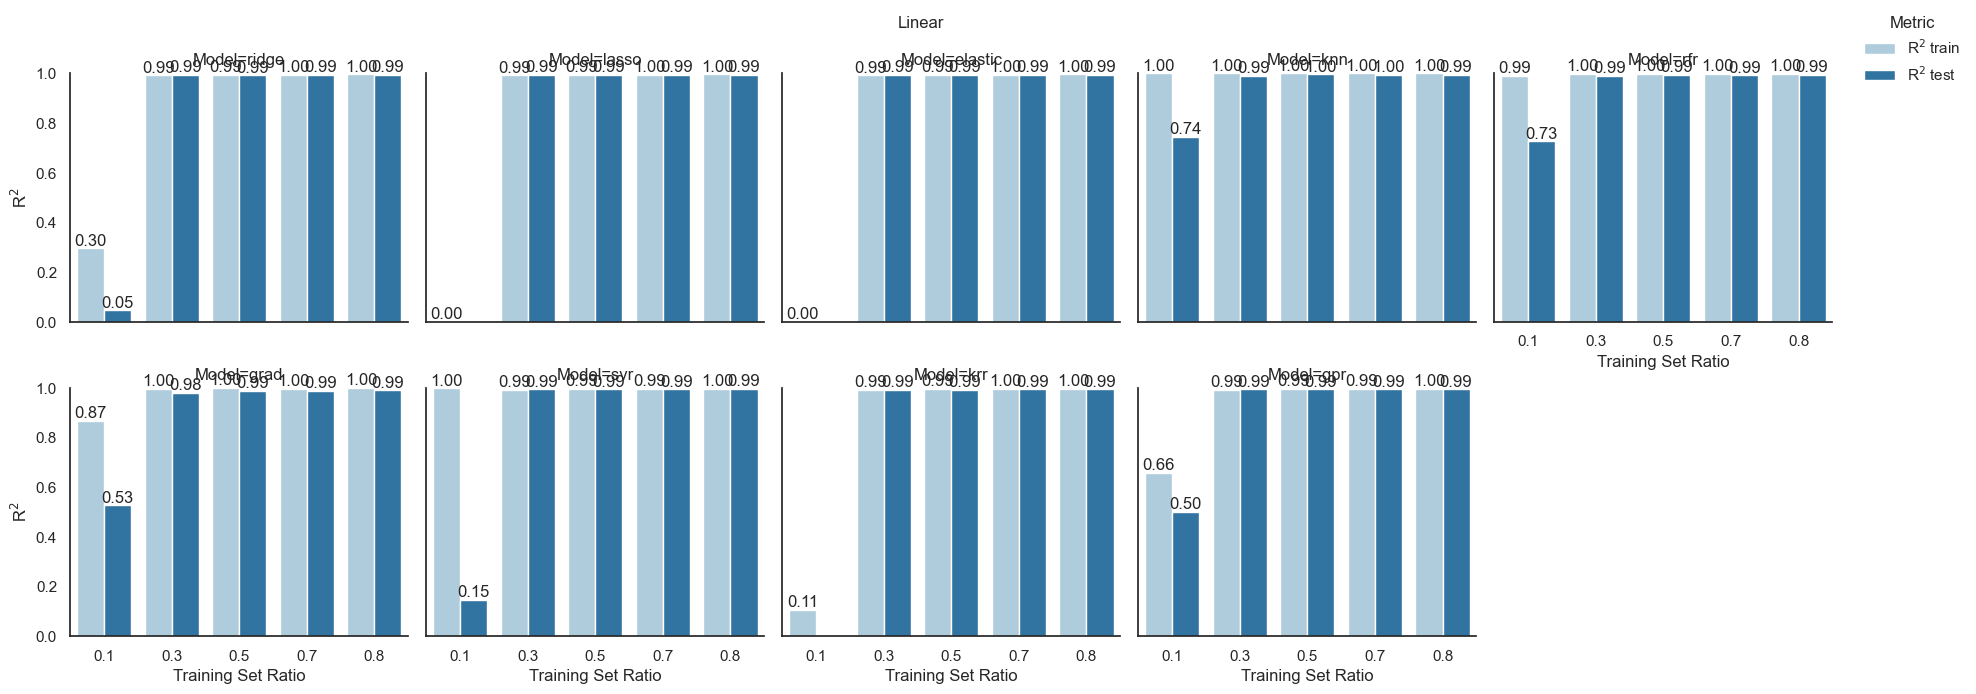

sine


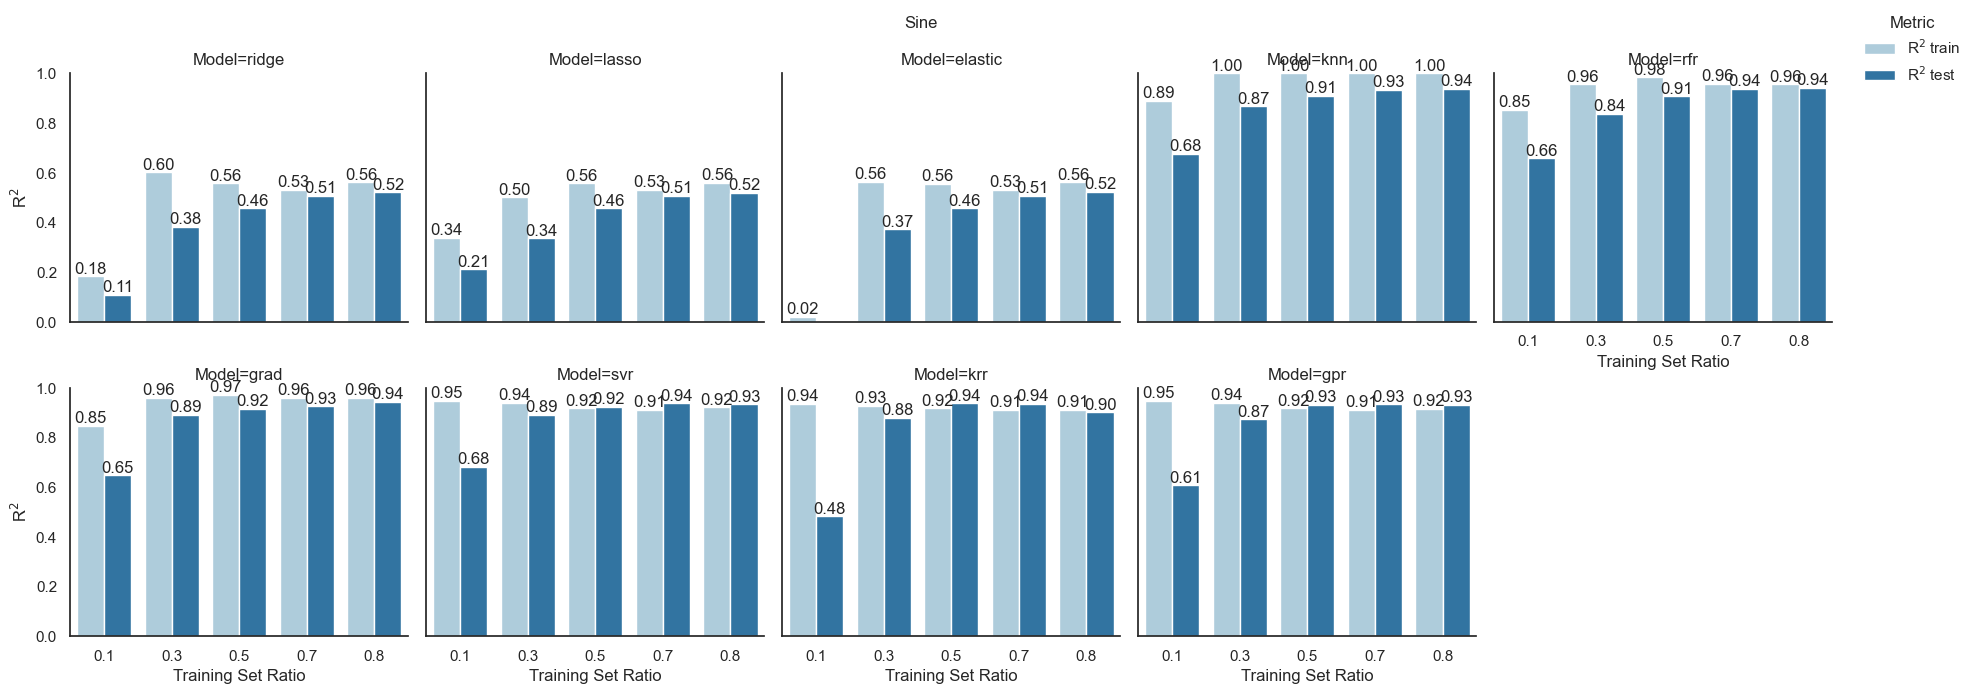

In [109]:
for i in dirs: 
    print(i)
    save_bar(i)

In [76]:
g.fig.figsize

AttributeError: 'Figure' object has no attribute 'figsize'

['__sizeof__', 'get_size_inches', 'set_size_inches']

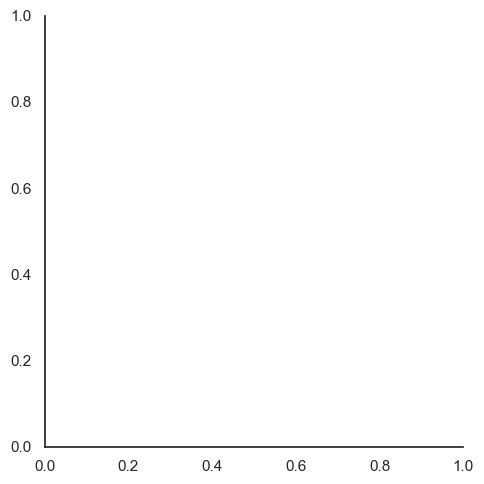

In [82]:
g=sns.catplot()
[i for i in dir(g.fig) if 'size' in i]